In [ ]:
!pip install folium

In [56]:
# Import the Pandas library
import pandas as pd
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np
import folium
from folium.plugins import HeatMap
from ipywidgets import Dropdown
import ipywidgets as widgets
from IPython.display import display, HTML

In [57]:
# Create a reference the CSV file desired
csv_path = Path("Resources/Crime_Data_from_2020_to_Present.csv")

# Read the CSV into a Pandas DataFrame
clean_data_df = pd.read_csv(csv_path, low_memory=False)

# display all columns
pd.set_option('display.max_columns', None)

# Print the first five rows of data to the screen
clean_data_df.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,victim_age,victim_sex,victim_descent,premise_code,premise_description,weapon_code,weapon_description,status,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [58]:
# Checking for missing values in each column
missing_values = clean_data_df.isnull().sum()
print(missing_values)

division_number             0
date_reported               0
date_occurred               0
area                        0
area_name                   0
reporting_district          0
part                        0
crime_code                  0
crime_description           0
modus_operandi         118311
victim_age                  0
victim_sex             112606
victim_descent         112614
premise_code               10
premise_description       518
weapon_code            556202
weapon_description     556202
status                      0
status_description          0
crime_code_1               11
crime_code_2           790429
crime_code_3           850837
crime_code_4           852888
location                    0
cross_street           717289
latitude                    0
longitude                   0
dtype: int64


In [59]:
# Checking for duplicate entries
duplicate_rows = clean_data_df.duplicated().sum()
print(duplicate_rows)

0


In [60]:
# Replace missing values
clean_data_df.fillna("Unknown", inplace=True)
clean_data_df.head()

/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_13903/6077641.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  clean_data_df.fillna("Unknown", inplace=True)


,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,victim_age,victim_sex,victim_descent,premise_code,premise_description,weapon_code,weapon_description,status,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,Unknown,Unknown,Unknown,1100 W 39TH PL,Unknown,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,Unknown,Unknown,Unknown,700 S HILL ST,Unknown,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,Unknown,Unknown,AA,Adult Arrest,845.0,Unknown,Unknown,Unknown,200 E 6TH ST,Unknown,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Unknown,Unknown,IC,Invest Cont,745.0,998.0,Unknown,Unknown,5400 CORTEEN PL,Unknown,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,Unknown,Unknown,IC,Invest Cont,740.0,Unknown,Unknown,Unknown,14400 TITUS ST,Unknown,34.2198,-118.4468


In [61]:
# Convert date columns to datetime
clean_data_df['date_reported'] = pd.to_datetime(clean_data_df['date_reported'], format='mixed')
clean_data_df['date_occurred'] = pd.to_datetime(clean_data_df['date_occurred'],  format='mixed')
clean_data_df.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,victim_age,victim_sex,victim_descent,premise_code,premise_description,weapon_code,weapon_description,status,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,Unknown,Unknown,Unknown,1100 W 39TH PL,Unknown,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,Unknown,Unknown,Unknown,700 S HILL ST,Unknown,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,Unknown,Unknown,AA,Adult Arrest,845.0,Unknown,Unknown,Unknown,200 E 6TH ST,Unknown,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Unknown,Unknown,IC,Invest Cont,745.0,998.0,Unknown,Unknown,5400 CORTEEN PL,Unknown,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,Unknown,Unknown,IC,Invest Cont,740.0,Unknown,Unknown,Unknown,14400 TITUS ST,Unknown,34.2198,-118.4468


In [62]:
clean_data_df.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,victim_age,victim_sex,victim_descent,premise_code,premise_description,weapon_code,weapon_description,status,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,Unknown,Unknown,Unknown,1100 W 39TH PL,Unknown,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,Unknown,Unknown,Unknown,700 S HILL ST,Unknown,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,Unknown,Unknown,AA,Adult Arrest,845.0,Unknown,Unknown,Unknown,200 E 6TH ST,Unknown,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Unknown,Unknown,IC,Invest Cont,745.0,998.0,Unknown,Unknown,5400 CORTEEN PL,Unknown,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,Unknown,Unknown,IC,Invest Cont,740.0,Unknown,Unknown,Unknown,14400 TITUS ST,Unknown,34.2198,-118.4468


In [63]:
# Create a column for Year and Month
clean_data_df['Year'] = clean_data_df['date_occurred'].dt.year
clean_data_df['Month'] = clean_data_df['date_occurred'].dt.month

In [64]:
import calendar
clean_data_df['Month'] = clean_data_df['Month'].apply(lambda x: calendar.month_abbr[x])
clean_data_df.head()




,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,victim_age,victim_sex,victim_descent,premise_code,premise_description,weapon_code,weapon_description,status,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude,Year,Month
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,Unknown,Unknown,Unknown,1100 W 39TH PL,Unknown,34.0141,-118.2978,2020,Jan
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,Unknown,Unknown,Unknown,700 S HILL ST,Unknown,34.0459,-118.2545,2020,Jan
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,Unknown,Unknown,AA,Adult Arrest,845.0,Unknown,Unknown,Unknown,200 E 6TH ST,Unknown,34.0448,-118.2474,2020,Feb
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Unknown,Unknown,IC,Invest Cont,745.0,998.0,Unknown,Unknown,5400 CORTEEN PL,Unknown,34.1685,-118.4019,2020,Jan
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,Unknown,Unknown,IC,Invest Cont,740.0,Unknown,Unknown,Unknown,14400 TITUS ST,Unknown,34.2198,-118.4468,2020,Jan


In [65]:
top_ten_crimes = clean_data_df['crime_description'].value_counts().head(10)
top_ten_crimes

crime_description
VEHICLE - STOLEN                                           91473
BATTERY - SIMPLE ASSAULT                                   67976
THEFT OF IDENTITY                                          53467
BURGLARY FROM VEHICLE                                      52611
BURGLARY                                                   51961
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    51826
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             48876
THEFT PLAIN - PETTY ($950 & UNDER)                         43402
INTIMATE PARTNER - SIMPLE ASSAULT                          42729
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            32875
Name: count, dtype: int64

In [66]:
clean_data_df['area_name'].nunique()

21

In [67]:
# Convert 'Month' and 'Year' columns to strings and concatenate them with a hyphen in between
clean_data_df['Month/Year'] = clean_data_df['Year'].astype(str) + '-' + clean_data_df['Month'].astype(str)

# Convert the combined column to datetime format
clean_data_df['Month/Year'] = pd.to_datetime(clean_data_df['Month/Year'])



/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_13903/201298303.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  clean_data_df['Month/Year'] = pd.to_datetime(clean_data_df['Month/Year'])


In [68]:
# Group by the 'Month/Year' column and count the occurrences of each period
crimes_by_month = clean_data_df.groupby(clean_data_df['Month/Year'].dt.to_period('M')).size().reset_index(name='Total Crimes')

# Optional: Convert the period index to a string format (e.g., 'YYYY-MM') for better readability
crimes_by_month['Month/Year'] = crimes_by_month['Month/Year'].astype(str)

# Display the DataFrame
print(crimes_by_month)

   Month/Year  Total Crimes
0     2020-01         18496
1     2020-02         17255
2     2020-03         16165
3     2020-04         15683
4     2020-05         17204
5     2020-06         17034
6     2020-07         17121
7     2020-08         16874
8     2020-09         15639
9     2020-10         16491
10    2020-11         15574
11    2020-12         15946
12    2021-01         16552
13    2021-02         15411
14    2021-03         16320
15    2021-04         16057
16    2021-05         16989
17    2021-06         17156
18    2021-07         18659
19    2021-08         18374
20    2021-09         18362
21    2021-10         19305
22    2021-11         18340
23    2021-12         17926
24    2022-01         18448
25    2022-02         17700
26    2022-03         19687
27    2022-04         19784
28    2022-05         20418
29    2022-06         20201
30    2022-07         19952
31    2022-08         20081
32    2022-09         19279
33    2022-10         20274
34    2022-11       

In [69]:
clean_data_df = clean_data_df.rename(columns = { 
                                                'division_number':'Division Number',
                                                'date_reported':'Report Date',
                                                'date_occurred':'Occurence Date',
                                                'area_name':'Precinct',
                                                'reporting_district':'Reporting District',
                                                'crime_code':'Crime Code',
                                                'crime_description':'Crime Description',
                                                'modus_operandi':'Modus Operandi',
                                                'victim_age':'Victim Age',
                                                'victim_sex':'Victim Sex',
                                                'victim_descent':'Victim Descent',
                                                'premise_description':'Premise Description',
                                                'weapon_description':'Weapon Description',
                                                'status_description':'Status Description',
                                                'crime_code_1':'Crime Code 1',
                                                'crime_code_2':'Crime Code 2',
                                                'crime_code_3':'Crime Code 3',
                                                'crime_code_4':'Crime Code 4',
                                                'location':'Location',
                                                'latitude':'Latitude',
                                                'longitude':'Longitude',
                                                'Month/Year':'Month/Year',
                                                'Year':'Year',
                                                'Month':'Month'
})

In [70]:
clean_data_df.head()

,Division Number,Report Date,Occurence Date,area,Precinct,Reporting District,part,Crime Code,Crime Description,Modus Operandi,Victim Age,Victim Sex,Victim Descent,premise_code,Premise Description,weapon_code,Weapon Description,status,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Location,cross_street,Latitude,Longitude,Year,Month,Month/Year
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,Unknown,Unknown,Unknown,1100 W 39TH PL,Unknown,34.0141,-118.2978,2020,Jan,2020-01-01
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,Unknown,Unknown,Unknown,700 S HILL ST,Unknown,34.0459,-118.2545,2020,Jan,2020-01-01
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,Unknown,Unknown,AA,Adult Arrest,845.0,Unknown,Unknown,Unknown,200 E 6TH ST,Unknown,34.0448,-118.2474,2020,Feb,2020-02-01
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Unknown,Unknown,IC,Invest Cont,745.0,998.0,Unknown,Unknown,5400 CORTEEN PL,Unknown,34.1685,-118.4019,2020,Jan,2020-01-01
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,Unknown,Unknown,IC,Invest Cont,740.0,Unknown,Unknown,Unknown,14400 TITUS ST,Unknown,34.2198,-118.4468,2020,Jan,2020-01-01


In [71]:
# Convert 'Month/Year' column to datetime format
clean_data_df['Month/Year'] = pd.to_datetime(clean_data_df['Month/Year'])

# Filter the DataFrame to include only rows where any of the date columns is on or before 10/31/2023
filtered_data_df = clean_data_df[(clean_data_df['Report Date'] <= '2023-10-31') & 
                                 (clean_data_df['Occurence Date'] <= '2023-10-31') & 
                                 (clean_data_df['Month/Year'] <= '2023-10-31')]

# Display the filtered DataFrame
filtered_data_df

,Division Number,Report Date,Occurence Date,area,Precinct,Reporting District,part,Crime Code,Crime Description,Modus Operandi,Victim Age,Victim Sex,Victim Descent,premise_code,Premise Description,weapon_code,Weapon Description,status,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Location,cross_street,Latitude,Longitude,Year,Month,Month/Year
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,Unknown,Unknown,Unknown,1100 W 39TH PL,Unknown,34.0141,-118.2978,2020,Jan,2020-01-01
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,Unknown,Unknown,Unknown,700 S HILL ST,Unknown,34.0459,-118.2545,2020,Jan,2020-01-01
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,Unknown,Unknown,AA,Adult Arrest,845.0,Unknown,Unknown,Unknown,200 E 6TH ST,Unknown,34.0448,-118.2474,2020,Feb,2020-02-01
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Unknown,Unknown,IC,Invest Cont,745.0,998.0,Unknown,Unknown,5400 CORTEEN PL,Unknown,34.1685,-118.4019,2020,Jan,2020-01-01
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,Unknown,Unknown,IC,Invest Cont,740.0,Unknown,Unknown,Unknown,14400 TITUS ST,Unknown,34.2198,-118.4468,2020,Jan,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852944,231604807,2023-01-27,2023-01-26 18:00:00,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",1300 0329,23,M,H,122.0,"VEHICLE, PASSENGER/TRUCK",Unknown,Unknown,IC,Invest Cont,740.0,Unknown,Unknown,Unknown,12500 BRANFORD ST,Unknown,34.2466,-118.4054,2023,Jan,2023-01-01
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822,25,F,H,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,230.0,Unknown,Unknown,Unknown,12800 FILMORE ST,Unknown,34.2790,-118.4116,2023,Mar,2023-03-01
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,29,M,B,222.0,LAUNDROMAT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,230.0,Unknown,Unknown,Unknown,6100 S VERMONT AV,Unknown,33.9841,-118.2915,2023,Apr,2023-04-01
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,1822 0344,24,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),Unknown,Unknown,IC,Invest Cont,352.0,Unknown,Unknown,Unknown,500 S MAIN ST,Unknown,34.0467,-118.2485,2023,Jul,2023-07-01


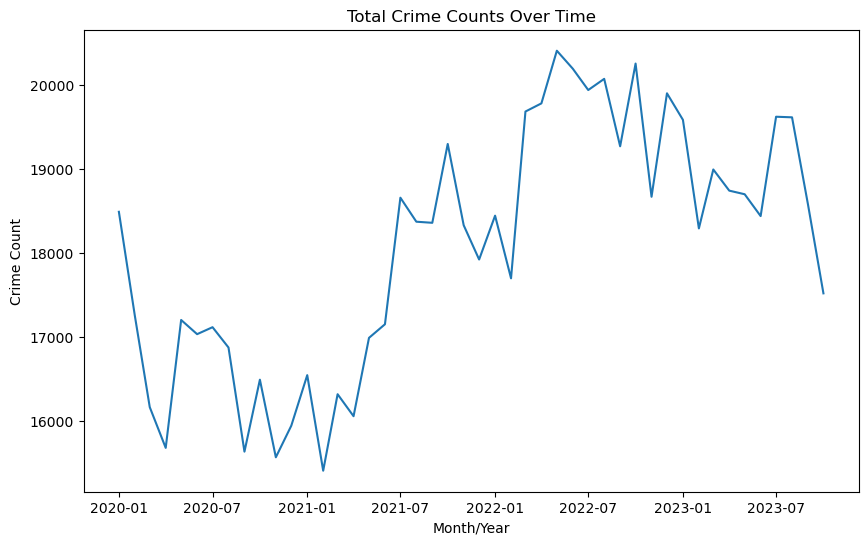

In [72]:

# Group by 'Month/Year
crime_counts_by_date = filtered_data_df.groupby('Month/Year').size()

# Plot the line plot
plt.figure(figsize=(10, 6))
plt.plot(crime_counts_by_date.index, crime_counts_by_date.values)
plt.title('Total Crime Counts Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Crime Count')
plt.box(True)
# plt.ylim = 'ylim'


plt.show()

/Users/michealmccloskey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michealmccloskey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michealmccloskey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/michealmccloskey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

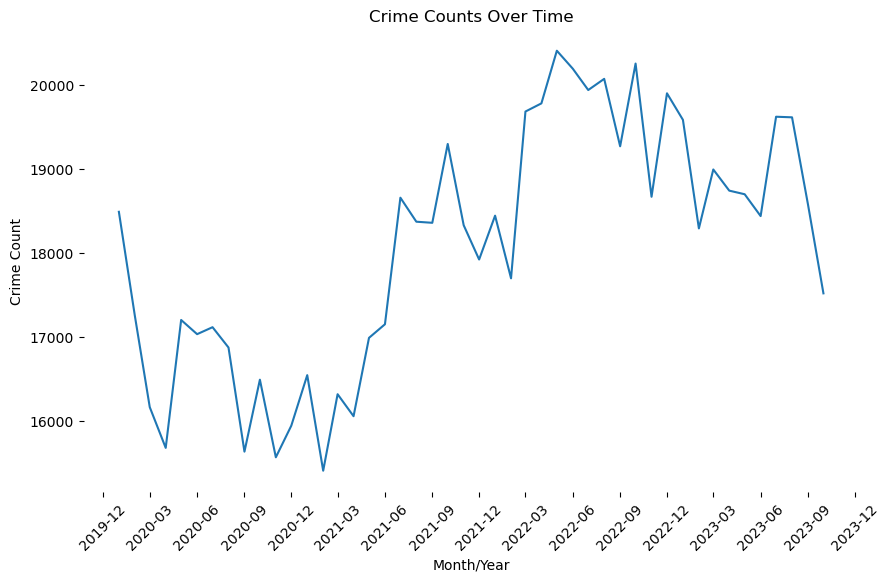

In [73]:


# Group by 'Month/Year' and count the number of crimes
crime_counts_by_year = filtered_data_df.groupby('Month/Year').size().reset_index(name='Crime Count')

# Plot the line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=crime_counts_by_year, x='Month/Year', y='Crime Count')

plt.title('Crime Counts Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Crime Count')
# plt.grid(False)
plt.box(False)

# Set x-axis ticks every 3 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)

plt.show()

In [74]:
precinct_counts = filtered_data_df['Precinct'].value_counts()
precinct_counts.sort_values(ascending=False).head(10)


Precinct
Central        55954
77th Street    52405
Pacific        48687
Southwest      46630
Hollywood      43972
Southeast      42310
Olympic        41997
Newton         41677
N Hollywood    41270
Wilshire       39533
Name: count, dtype: int64

In [75]:
# groupby to calculate total number of crimes by precinct
crime_counts_by_precinct = filtered_data_df.groupby(['Crime Description', 'Precinct']).size().reset_index(name='Total Crimes')
# Sort the data to find top 5 types of crime for each precinct
top_5_crimes_by_precinct = crime_counts_by_precinct.groupby('Precinct').apply(lambda x: x.nlargest(5, 'Total Crimes'))

# Filter the original dataset to include only rows with top 5 types of crime for each precinct
lead_crimes = filtered_data_df[filtered_data_df['Crime Description'].isin(top_5_crimes_by_precinct['Crime Description'])]

In [76]:
crime_counts_by_precinct.sum()

Crime Description    ARSONARSONARSONARSONARSONARSONARSONARSONARSONA...
Precinct             77th StreetCentralDevonshireFoothillHarborHoll...
Total Crimes                                                    831206
dtype: object

In [77]:
top_5_crimes_by_precinct

Crime Description     Precinct  \
Precinct                                                                        
77th Street 2233                                VEHICLE - STOLEN  77th Street   
            42    ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  77th Street   
            84                          BATTERY - SIMPLE ASSAULT  77th Street   
            1935                               THEFT OF IDENTITY  77th Street   
            1201               INTIMATE PARTNER - SIMPLE ASSAULT  77th Street   
...                                                          ...          ...   
Wilshire    355                                         BURGLARY     Wilshire   
            2253                                VEHICLE - STOLEN     Wilshire   
            104                         BATTERY - SIMPLE ASSAULT     Wilshire   
            376                            BURGLARY FROM VEHICLE     Wilshire   
            1997              THEFT PLAIN - PETTY ($950 & UNDER)     Wilshire   

                  Total Crimes  
Precinct                        
77th Street 2233          6839  
            42            5226  
            84            4065  
            1935          3811  
            1201          3601  
...                        ...  
Wilshire    355           3254  
            2253          3243  
            104           2815  
            376           2664  
            1997          2570  

[105 rows x 3 columns]

In [78]:
lead_crimes.head()

,Division Number,Report Date,Occurence Date,area,Precinct,Reporting District,part,Crime Code,Crime Description,Modus Operandi,Victim Age,Victim Sex,Victim Descent,premise_code,Premise Description,weapon_code,Weapon Description,status,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Location,cross_street,Latitude,Longitude,Year,Month,Month/Year
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,Unknown,Unknown,Unknown,1100 W 39TH PL,Unknown,34.0141,-118.2978,2020,Jan,2020-01-01
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,Unknown,Unknown,Unknown,700 S HILL ST,Unknown,34.0459,-118.2545,2020,Jan,2020-01-01
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,Unknown,Unknown,IC,Invest Cont,740.0,Unknown,Unknown,Unknown,14400 TITUS ST,Unknown,34.2198,-118.4468,2020,Jan,2020-01-01
6,200100502,2020-01-02,2020-01-02 13:15:00,1,Central,161,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),1402 2004 0344 0387,23,M,H,404.0,DEPARTMENT STORE,Unknown,Unknown,IC,Invest Cont,442.0,998.0,Unknown,Unknown,700 S FIGUEROA ST,Unknown,34.0483,-118.2631,2020,Jan,2020-01-01
10,200100509,2020-01-04,2020-01-04 22:00:00,1,Central,192,1,330,BURGLARY FROM VEHICLE,1822 1414 0344 1307,29,M,A,101.0,STREET,306.0,ROCK/THROWN OBJECT,IC,Invest Cont,330.0,Unknown,Unknown,Unknown,15TH,OLIVE,34.0359,-118.2648,2020,Jan,2020-01-01


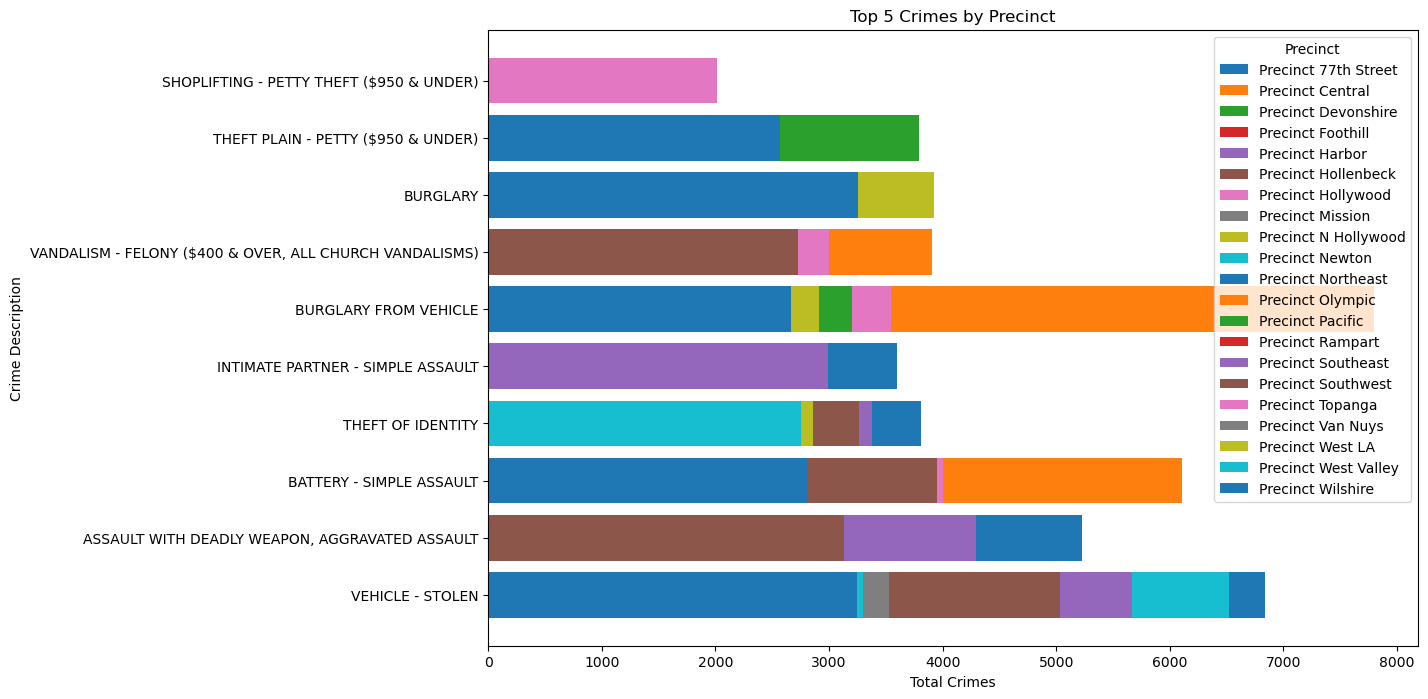

In [79]:

# function to get top 5 crimes for each precinct
def get_top_5_crimes(df):
    return df.nlargest(5, 'Total Crimes')

# Apply the function to each group within the 'Precinct' group and concatenate the results into a single DataFrame
top_5_crimes_by_precinct = crime_counts_by_precinct.groupby('Precinct').apply(get_top_5_crimes).reset_index(drop=True)

# Plot the bar chart
plt.figure(figsize=(12, 8))
for precinct, group in top_5_crimes_by_precinct.groupby('Precinct'):
    plt.barh(group['Crime Description'], group['Total Crimes'], label=f'Precinct {precinct}')

plt.xlabel('Total Crimes')
plt.ylabel('Crime Description')
plt.title('Top 5 Crimes by Precinct')
plt.legend(title='Precinct')
plt.show()

In [192]:
crime_counts_by_precinct = filtered_data_df.groupby('Precinct').size().reset_index(name='Total Crimes')

# Find the top 5 precincts with the most reported crimes
top_5_precincts = crime_counts_by_precinct.nlargest(5, 'Total Crimes')

print(top_5_precincts)

       Precinct  Total Crimes
1       Central         55954
0   77th Street         52405
12      Pacific         48687
15    Southwest         46630
6     Hollywood         43972


In [196]:
top_5_precincts_list = top_5_precincts['Precinct'].tolist()
top_5_data = filtered_data_df[filtered_data_df['Precinct'].isin(top_5_precincts_list)]

# Group the filtered data by 'Crime Description' and count occurrences
crime_counts_by_description = top_5_data.groupby('Crime Description').size().reset_index(name='Total Crimes')

# Sort the counts in descending order
sorted_crime_counts = crime_counts_by_description.sort_values(by='Total Crimes', ascending=False)

# Select the top 5 most common crimes
top_5_crimes = sorted_crime_counts.head(5)
top_5_crimes_list = top_5_crimes['Crime Description'].tolist()


In [197]:
top_5_crimes_df = filtered_data_df[filtered_data_df['Crime Description'].isin(top_5_crimes_list)]
top_5_crimes_df.head()

,Division Number,Report Date,Occurence Date,area,Precinct,Reporting District,part,Crime Code,Crime Description,Modus Operandi,Victim Age,Victim Sex,Victim Descent,premise_code,Premise Description,weapon_code,Weapon Description,status,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Location,cross_street,Latitude,Longitude,Year,Month,Month/Year,Hour,weekday_name,Quarter
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,Unknown,Unknown,Unknown,1100 W 39TH PL,Unknown,34.0141,-118.2978,2020,2020-01,2020-01-01,22,Wednesday,2020Q1
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,Unknown,Unknown,Unknown,700 S HILL ST,Unknown,34.0459,-118.2545,2020,2020-01,2020-01-01,3,Wednesday,2020Q1
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,Unknown,Unknown,IC,Invest Cont,740.0,Unknown,Unknown,Unknown,14400 TITUS ST,Unknown,34.2198,-118.4468,2020,2020-01,2020-01-01,4,Wednesday,2020Q1
10,200100509,2020-01-04,2020-01-04 22:00:00,1,Central,192,1,330,BURGLARY FROM VEHICLE,1822 1414 0344 1307,29,M,A,101.0,STREET,306.0,ROCK/THROWN OBJECT,IC,Invest Cont,330.0,Unknown,Unknown,Unknown,15TH,OLIVE,34.0359,-118.2648,2020,2020-01,2020-01-01,22,Saturday,2020Q1
24,200100546,2020-01-15,2020-01-15 07:00:00,1,Central,166,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0913 2004 1218,62,M,A,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,AO,Adult Other,230.0,Unknown,Unknown,Unknown,600 SAN JULIAN ST,Unknown,34.0428,-118.2461,2020,2020-01,2020-01-01,7,Wednesday,2020Q1


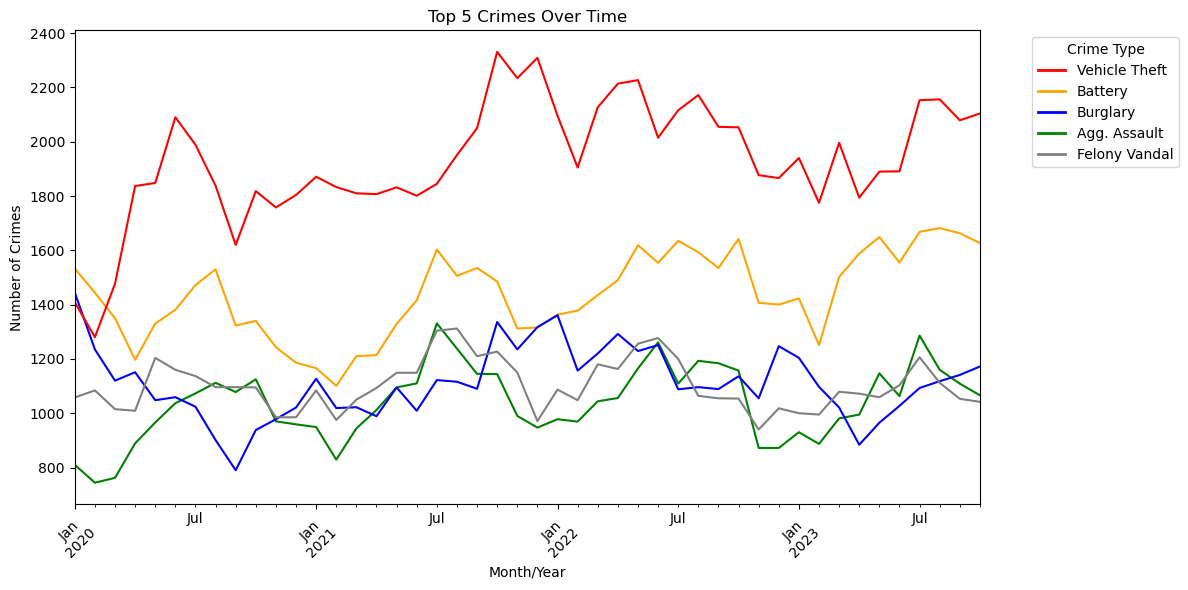

In [222]:
# group by month/year
top_5_by_month_year = top_5_crimes_df.groupby(['Month/Year', 'Crime Description']).size().unstack(fill_value=0)

# Convert 'Month/Year' column to datetime format
top_5_by_month_year.index = pd.to_datetime(top_5_by_month_year.index)

legend_labels = {
    'VEHICLE - STOLEN': 'Vehicle Theft',
    'BATTERY - SIMPLE ASSAULT': 'Battery',
    'BURGLARY FROM VEHICLE': 'Burglary',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'Agg. Assault',
    'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 'Felony Vandal'
   }
color_dict = {
    'VEHICLE - STOLEN': 'red',
    'BATTERY - SIMPLE ASSAULT': 'orange',
    'BURGLARY FROM VEHICLE': 'blue',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'green',
    'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 'grey'
}
# Plot the data
ax = top_5_by_month_year.plot(kind='line', figsize=(12, 6), color=[color_dict.get(x, '#333333') for x in top_5_by_month_year.columns])

# Customize the plot
plt.title('Top 5 Crimes Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)

# Add a legend with custom colors
handles = [plt.Line2D([0], [0], color=color_dict[key], linewidth=2, linestyle='-') for key in color_dict]
labels = [legend_labels.get(key, key) for key in color_dict]
plt.legend(handles, labels, title='Crime Type', bbox_to_anchor=(1.05, 1), loc='best')

# Show the plot
plt.tight_layout()
# plt.box(False)
plt.show()

/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_13903/1915349499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_df['Hour'] = filtered_data_df['Occurence Date'].dt.hour
/Users/michealmccloskey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michealmccloskey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users

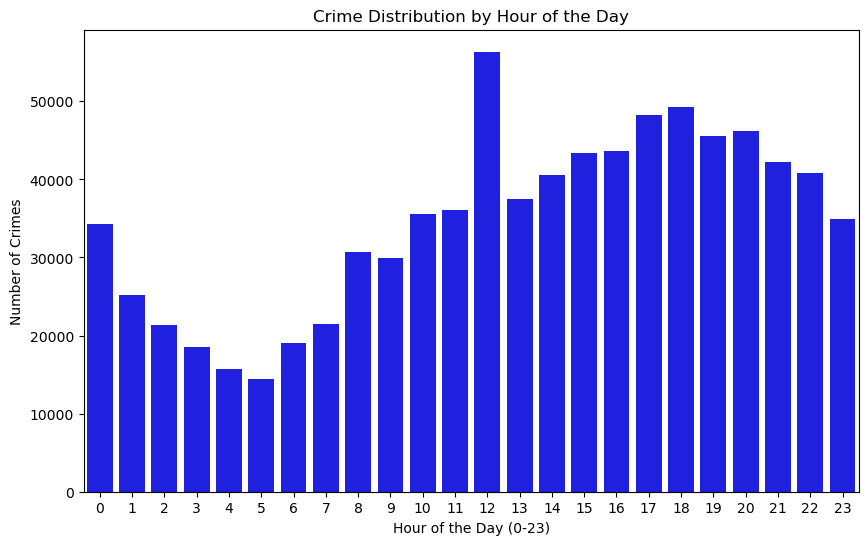

In [83]:
# Extracting hour from the 'date_occurred' column
filtered_data_df['Hour'] = filtered_data_df['Occurence Date'].dt.hour

# Counting crimes by each hour of the day
hourly_crime_counts = filtered_data_df['Hour'].value_counts().sort_index()

# Plotting the distribution of crimes by hour
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_crime_counts.index, y=hourly_crime_counts.values, color = "blue")

# Updating plot labels and title
plt.title('Crime Distribution by Hour of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Number of Crimes')

# Show the plot
plt.xticks(range(24), [str(hour) for hour in range(24)])  # Set x-axis ticks

plt.show()

In [84]:
filtered_data_df.head()

,Division Number,Report Date,Occurence Date,area,Precinct,Reporting District,part,Crime Code,Crime Description,Modus Operandi,Victim Age,Victim Sex,Victim Descent,premise_code,Premise Description,weapon_code,Weapon Description,status,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Location,cross_street,Latitude,Longitude,Year,Month,Month/Year,Hour
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,Unknown,Unknown,Unknown,1100 W 39TH PL,Unknown,34.0141,-118.2978,2020,Jan,2020-01-01,22
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,Unknown,Unknown,Unknown,700 S HILL ST,Unknown,34.0459,-118.2545,2020,Jan,2020-01-01,3
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,Unknown,Unknown,AA,Adult Arrest,845.0,Unknown,Unknown,Unknown,200 E 6TH ST,Unknown,34.0448,-118.2474,2020,Feb,2020-02-01,12
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Unknown,Unknown,IC,Invest Cont,745.0,998.0,Unknown,Unknown,5400 CORTEEN PL,Unknown,34.1685,-118.4019,2020,Jan,2020-01-01,17
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,Unknown,Unknown,IC,Invest Cont,740.0,Unknown,Unknown,Unknown,14400 TITUS ST,Unknown,34.2198,-118.4468,2020,Jan,2020-01-01,4


/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_13903/664553853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_df['weekday_name'] = filtered_data_df['Occurence Date'].dt.day_name()


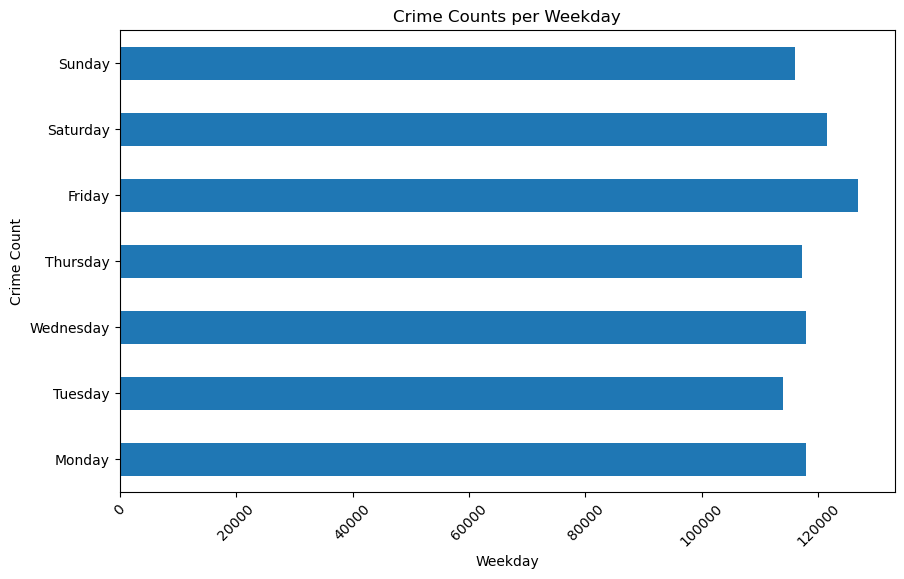

In [85]:
# new column for weekday name
filtered_data_df['weekday_name'] = filtered_data_df['Occurence Date'].dt.day_name()

# Group by weekday name and count the occurrences
crime_counts_per_weekday = filtered_data_df['weekday_name'].value_counts()

# Plot the data
crime_counts_per_weekday = crime_counts_per_weekday.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
crime_counts_per_weekday.plot(kind='barh', figsize=(10, 6))
plt.title('Crime Counts per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.show()

In [86]:

# crime_counts_by_month_year.head()
filtered_data_df_copy = filtered_data_df.copy()

# Convert the 'Occurrence Date' column to datetime
filtered_data_df_copy['Occurence Date'] = pd.to_datetime(filtered_data_df_copy['Occurence Date'])

# Group by 'Occurrence Date' and count the number of crimes in each month
monthly_crime_counts = filtered_data_df_copy.resample('M', on='Occurence Date').size()

# Calculate the month-to-month changes
monthly_changes = monthly_crime_counts.diff()

# Find the largest positive and negative changes
largest_increase = monthly_changes.idxmax(), monthly_changes.max()
largest_decrease = monthly_changes.idxmin(), monthly_changes.min()
# Create a DataFrame 
changes_df = pd.DataFrame({'Month': monthly_changes.index, 'Change': monthly_changes.values})

# Sort the DataFrame by 'Change' in descending order
changes_df_sorted = changes_df.sort_values(by='Change', ascending=False)
changes_df_sorted.head(10)

,Month,Change
26,2022-03-31,1986.0
4,2020-05-31,1523.0
18,2021-07-31,1507.0
35,2022-12-31,1232.0
42,2023-07-31,1183.0
33,2022-10-31,985.0
21,2021-10-31,939.0
16,2021-05-31,933.0
14,2021-03-31,911.0
9,2020-10-31,857.0


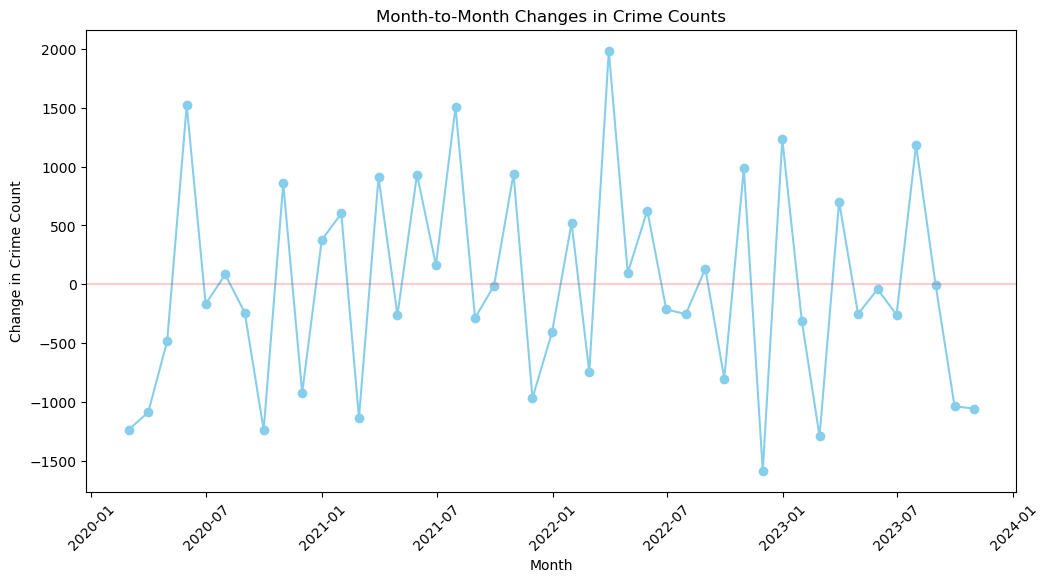

In [87]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(changes_df['Month'], changes_df['Change'], marker='o', color='skyblue', linestyle='-')
plt.title('Month-to-Month Changes in Crime Counts')
plt.xlabel('Month')
plt.ylabel('Change in Crime Count')
plt.xticks(rotation=45)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.2)

plt.grid=False
plt.show()



In [88]:
changes_df.dtypes


Month     datetime64[ns]
Change           float64
dtype: object

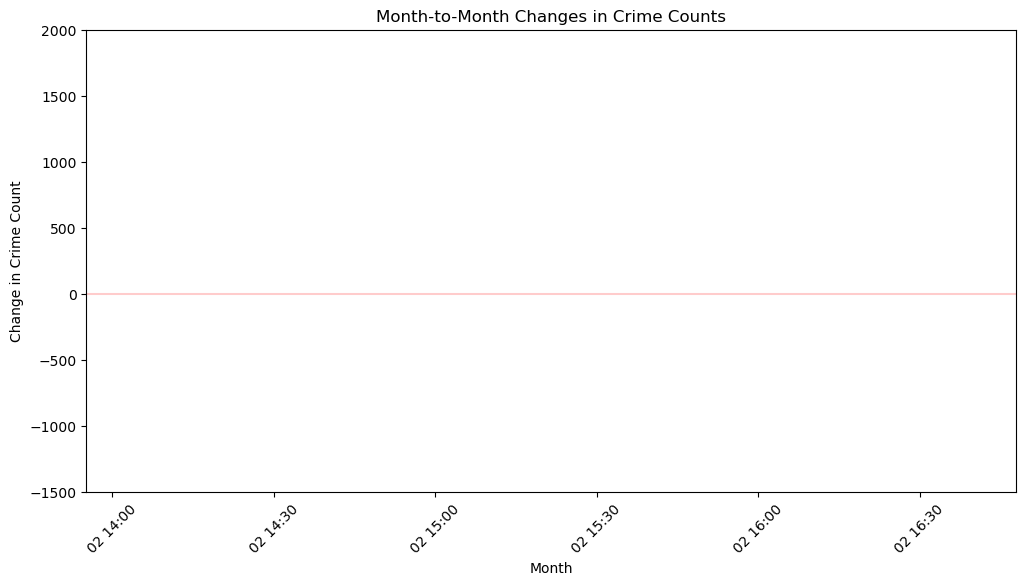

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(changes_df['Month'], changes_df['Change'], marker='o', color='skyblue', linestyle='-')
plt.title('Month-to-Month Changes in Crime Counts')
plt.xlabel('Month')
plt.ylabel('Change in Crime Count')
plt.xticks(rotation=45)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.2)

plt.xlim([1.58,1.70]) 
plt.ylim([-1500,2000])

plt.show()

The r-squared is: 3.245335931312172e-05


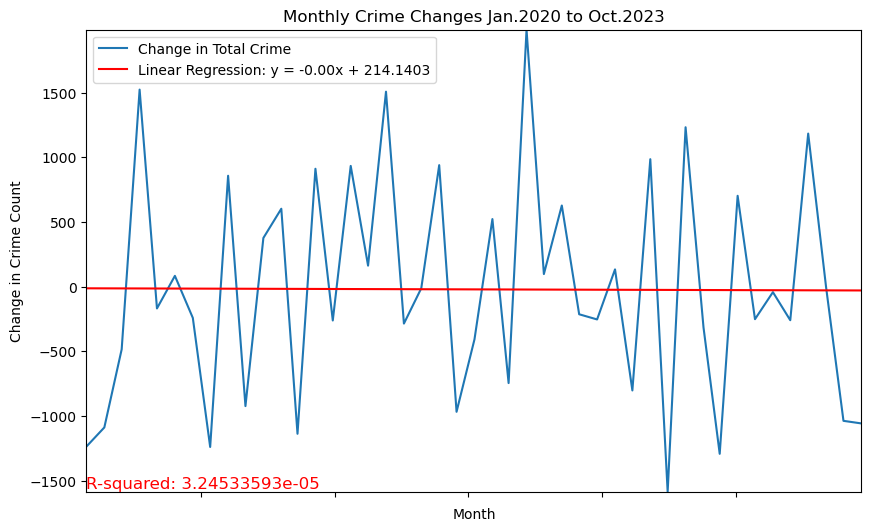

In [102]:
from scipy.stats import linregress
import numpy as np
# change dtypes of data
changes_df['Month'] = changes_df['Month'].astype(int) 
changes_df['Change'] = changes_df['Change'].astype(float)  

x_values = changes_df['Month']
y_values = changes_df['Change']
changes_df.dropna(inplace=True)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = {:.2f}x + {:.4f}".format(slope, intercept)

# Create the figure and plot data and regression line
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, '-', label='Change in Total Crime')  # Keep data points for reference
plt.plot(x_values, regress_values, 'r-', label='Linear Regression: y = -0.00x + 214.1403')

# Add regression equation annotation
# plt.annotate(line_eq, (1.59, 1800), fontsize=15, color="red")
plt.text(np.min(x_values), np.min(y_values), f"R-squared: 3.24533593e-05", fontsize=12, color="red", va='bottom', ha='left')


plt.xlim(np.min(x_values), np.max(x_values))
plt.ylim(np.min(y_values), np.max(y_values))

# Set labels and show the plot
plt.xlabel('Month')
plt.ylabel('Change in Crime Count')
plt.legend()
plt.title('Monthly Crime Changes Jan.2020 to Oct.2023')
print(f"The r-squared is: {rvalue**2}")
plt.gca().xaxis.set_major_formatter('')


plt.show()


In [103]:
changes_df.describe()

,Month,Change
count,4.500000e+01,45.000000
mean,1.640836e+18,-21.577778
std,3.452311e+16,870.578086
min,1.582934e+18,-1586.000000
25%,1.612051e+18,-746.000000
50%,1.640909e+18,-169.000000
75%,1.669766e+18,627.000000
max,1.698710e+18,1986.000000


In [104]:
changes_df.head()

,Month,Change
1,1582934400000000000,-1237.0
2,1585612800000000000,-1089.0
3,1588204800000000000,-485.0
4,1590883200000000000,1523.0
5,1593475200000000000,-169.0


In [105]:
import scipy.stats as st
#This will compute the Pearson correlation coefficient between Month and Change in crime counts

month = changes_df.iloc[:,0]
change = changes_df.iloc[:,1]
correlation = st.pearsonr(month,change)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.01


The correlation between both factors is -0.01


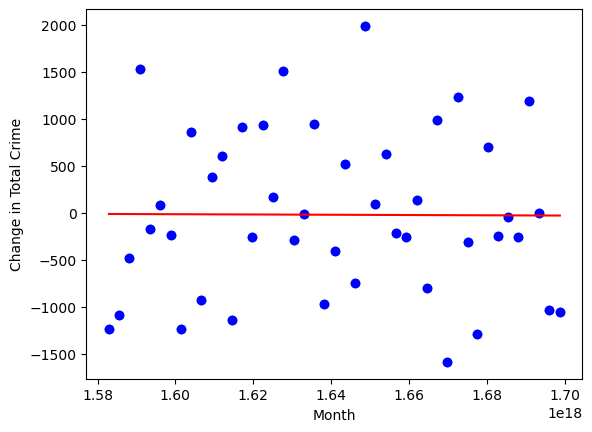

In [154]:
# Compare the calcualted Pearson's r to the plots
plt.scatter(month,change)
plt.xlabel('Month')
plt.ylabel('Change in Total Crime')
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = changes_df['Month']
y_values = changes_df['Change']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1.58,2000),fontsize=15,color="red")
plt.xlabel('Month')
plt.ylabel('Change in Total Crime')
plt.show()

In [107]:

# Filter the data for the year 2020
data_2020 = filtered_data_df[filtered_data_df['Year'] == 2020]
top_crimes_2020 = data_2020["Crime Description"].value_counts()
top_crimes_2020.head()

Crime Description
VEHICLE - STOLEN                                           20768
BATTERY - SIMPLE ASSAULT                                   16329
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    12924
BURGLARY                                                   12836
BURGLARY FROM VEHICLE                                      12709
Name: count, dtype: int64

In [108]:
# Filter the data for the year 2021
data_2021 = filtered_data_df[filtered_data_df['Year'] == 2021]
top_crimes_2021 = data_2021["Crime Description"].value_counts()
top_crimes_2021.head()


Crime Description
VEHICLE - STOLEN                                           23674
BATTERY - SIMPLE ASSAULT                                   16193
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    13674
BURGLARY FROM VEHICLE                                      13477
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             12734
Name: count, dtype: int64

In [109]:
# Filter the data for the year 2022
data_2022 = filtered_data_df[filtered_data_df['Year'] == 2022]
top_crimes_2022 = data_2022["Crime Description"].value_counts()
top_crimes_2022.head()

Crime Description
VEHICLE - STOLEN            24723
THEFT OF IDENTITY           21777
BATTERY - SIMPLE ASSAULT    18051
BURGLARY FROM VEHICLE       14221
BURGLARY                    14053
Name: count, dtype: int64

In [110]:
# Filter the data for the year 2023
data_2023 = filtered_data_df[filtered_data_df['Year'] == 2023]
top_crimes_2023 = data_2023["Crime Description"].value_counts()
top_crimes_2023

Crime Description
VEHICLE - STOLEN                                      19778
BATTERY - SIMPLE ASSAULT                              15608
BURGLARY                                              11472
THEFT OF IDENTITY                                     10816
BURGLARY FROM VEHICLE                                 10722
                                                      ...  
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)        1
FAILURE TO DISPERSE                                       1
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)              1
TELEPHONE PROPERTY - DAMAGE                               1
PETTY THEFT - AUTO REPAIR                                 1
Name: count, Length: 129, dtype: int64

In [111]:
# Define the top 5 crimes for each year
top_5_crimes_by_year = {
    2020: ["VEHICLE - STOLEN", "BATTERY - SIMPLE ASSAULT", "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",
           "BURGLARY", "BURGLARY FROM VEHICLE"],
    2021: ["VEHICLE - STOLEN", "BATTERY - SIMPLE ASSAULT", "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",
           "BURGLARY FROM VEHICLE", "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"],
    2022: ["VEHICLE - STOLEN", "THEFT OF IDENTITY ", "BATTERY - SIMPLE ASSAULT", "BURGLARY FROM VEHICLE", "BURGLARY"],
    2023: ["VEHICLE - STOLEN", "BATTERY - SIMPLE ASSAULT", "BURGLARY", "BURGLARY FROM VEHICLE",
           "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)"]
}

# Define the top 5 precincts
top_5_precincts = {
    "Central": [34.0519, -118.2553],
    "Southwest": [34.0297, -118.3310],
    "Hollenbeck": [34.0496, -118.2088],
    "Harbor": [33.7576608970001, -118.289241553],
    "77th Street": [33.9703073800001, -118.277669655]
}

# Preprocess the dataset to filter data for the selected year and top 5 crimes
def filter_data_by_year_and_top_crimes(year, top_crimes):
    return filtered_data_df[(filtered_data_df['Year'] == year) & (filtered_data_df['Crime Description'].isin(top_crimes))]

# Group the data by latitude and longitude and count the number of crimes
def group_by_location(data):
    return data.groupby(['Latitude', 'Longitude']).size().reset_index(name='Crime Count')

# Create a heatmap using folium
def create_heatmap(data):
    m = folium.Map(location=[34.0522, -118.2437], zoom_start=10)
    heatmap_data = [[row['Latitude'], row['Longitude'], row['Crime Count']] for index, row in data.iterrows()]
    folium.plugins.HeatMap(heatmap_data).add_to(m)
    return m
    
# Define a callback function to update the heatmap based on the selected year
def update_heatmap(year):
    filtered_data = filter_data_by_year_and_top_crimes(int(year), top_5_crimes_by_year[int(year)])
    grouped_data = group_by_location(filtered_data)
    heatmap = create_heatmap(grouped_data)

    # Add markers for the top 5 precincts
    for precinct, location in top_5_precincts.items():
        folium.Marker(location=location, popup=precinct).add_to(heatmap)

    display(heatmap)

# Create a dropdown widget for selecting the year
dropdown = widgets.Dropdown(
    options=[('2020', 2020), ('2021', 2021), ('2022', 2022), ('2023', 2023)],
    value=2021,
    description='Year:',
    disabled=False,
)

# Display the dropdown widget
display(dropdown)

# Create an observer to update the heatmap when the dropdown value changes
dropdown.observe(lambda change: update_heatmap(change.new), names='value')

# Display the initial heatmap
update_heatmap(dropdown.value)



Dropdown(description='Year:', index=1, options=(('2020', 2020), ('2021', 2021), ('2022', 2022), ('2023', 2023)…

In [112]:
# Define the top 5 crimes for each year
top_5_crimes_by_year = {
    2020: ["VEHICLE - STOLEN", "BATTERY - SIMPLE ASSAULT", "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",
           "BURGLARY", "BURGLARY FROM VEHICLE"],
    2021: ["VEHICLE - STOLEN", "BATTERY - SIMPLE ASSAULT", "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",
           "BURGLARY FROM VEHICLE", "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"],
    2022: ["VEHICLE - STOLEN", "THEFT OF IDENTITY ", "BATTERY - SIMPLE ASSAULT", "BURGLARY FROM VEHICLE", "BURGLARY"],
    2023: ["VEHICLE - STOLEN", "BATTERY - SIMPLE ASSAULT", "BURGLARY", "BURGLARY FROM VEHICLE",
           "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)"]
}

# Define the top 5 precincts
top_5_precincts = {
    "Central": [34.0519, -118.2553],
    "Southwest": [34.0297, -118.3310],
    "Hollenbeck": [34.0496, -118.2088],
    "Harbor": [33.7576608970001, -118.289241553],
    "77th Street": [33.9703073800001, -118.277669655]
}

# Preprocess the dataset to filter data for the selected year and top 5 crimes
def filter_data_by_year_and_top_crimes(year, top_crimes):
    return filtered_data_df[(filtered_data_df['Year'] == year) & (filtered_data_df['Crime Description'].isin(top_crimes))]

# Group the data by latitude and longitude and count the number of crimes
def group_by_location(data):
    return data.groupby(['Latitude', 'Longitude']).size().reset_index(name='Crime Count')

# Create a heatmap using folium
def create_heatmap(data):
    m = folium.Map(location=[34.0522, -118.2437], zoom_start=10)
    heatmap_data = [[row['Latitude'], row['Longitude'], row['Crime Count']] for index, row in data.iterrows()]
    folium.plugins.HeatMap(heatmap_data).add_to(m)
    return m

# Define a callback function to update the heatmap based on the selected year
def update_heatmap(year):
    filtered_data = filter_data_by_year_and_top_crimes(int(year), top_5_crimes_by_year[int(year)])
    grouped_data = group_by_location(filtered_data)
    heatmap = create_heatmap(grouped_data)

    # Add markers for the top 5 precincts
    for precinct, location in top_5_precincts.items():
        folium.Marker(location=location, popup=precinct).add_to(heatmap)

    display(heatmap)

# Create a dropdown widget for selecting the year
dropdown = widgets.Dropdown(
    options=[('2020', 2020), ('2021', 2021), ('2022', 2022), ('2023', 2023)],
    value=2020,
    description='Year:',
    disabled=False,
)

# Display the dropdown widget
display(dropdown)

# Create an observer to update the heatmap when the dropdown value changes
dropdown.observe(lambda change: update_heatmap(change.new), names='value')

# Display the initial heatmap
update_heatmap(dropdown.value)

Dropdown(description='Year:', options=(('2020', 2020), ('2021', 2021), ('2022', 2022), ('2023', 2023)), value=…

In [113]:
# Create a base map centered around Los Angeles
m = folium.Map(location=[34.052235, -118.243683], zoom_start=10)

# Add LAPD police precincts as markers
police_stations = [
    {"name": "Central", "location": [34.0519, -118.2553]},
    {"name": "Southwest", "location": [34.0297, -118.3310]},
    {"name": "Hollenbeck", "location": [34.0496, -118.2088]},
    {"name": "Harbor", "location": [33.7576608970001, -118.289241553]},
    {"name": "77th Street", "location": [33.9703073800001, -118.277669655]},
    {"name": "Southeast", "location": [33.9386273800001, -118.275394206]},
    {"name": "Newton", "location": [34.012355905, -118.256118891]},
    {"name": "West Los Angeles", "location": [34.0437774120001, -118.450779541]},
    {"name": "Wilshire", "location": [34.046747682, -118.342829525]},
    {"name": "Olympic", "location": [34.050208529, -118.291175911]},
    {"name": "Rampart", "location": [34.056690437, -118.266979649]},
    {"name": "Hollywood", "location": [34.095833225, -118.33066931]},
    {"name": "Northeast", "location": [34.119200666, -118.249414484]},
    {"name": "North Hollywood", "location": [34.1716939300001, -118.385859348]},
    {"name": "Van Nuys", "location": [34.1837432730001, -118.445225709]},
    {"name": "West Valley", "location": [34.193397227, -118.547454438]},
    {"name": "Topanga", "location": [34.221376654, -118.599636542]},
    {"name": "Pacific", "location": [33.9916553210001, -118.419841576]},
    {"name": "Foothill", "location": [34.2530912220001, -118.410417183]},
    {"name": "Devonshire", "location": [34.256969059, -118.531373363]},
    {"name": "Mission", "location": [34.272979397, -118.468197808]}
    
]

for station in police_stations:
    folium.Marker(location=station["location"], popup=station["name"]).add_to(m)

# Save the map as HTML
m.save("police_precincts.html")

# Display the map
m

In [114]:
filtered_data_df.head()

,Division Number,Report Date,Occurence Date,area,Precinct,Reporting District,part,Crime Code,Crime Description,Modus Operandi,Victim Age,Victim Sex,Victim Descent,premise_code,Premise Description,weapon_code,Weapon Description,status,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Location,cross_street,Latitude,Longitude,Year,Month,Month/Year,Hour,weekday_name
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,Unknown,Unknown,Unknown,1100 W 39TH PL,Unknown,34.0141,-118.2978,2020,Jan,2020-01-01,22,Wednesday
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,Unknown,Unknown,Unknown,700 S HILL ST,Unknown,34.0459,-118.2545,2020,Jan,2020-01-01,3,Wednesday
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,Unknown,Unknown,AA,Adult Arrest,845.0,Unknown,Unknown,Unknown,200 E 6TH ST,Unknown,34.0448,-118.2474,2020,Feb,2020-02-01,12,Thursday
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Unknown,Unknown,IC,Invest Cont,745.0,998.0,Unknown,Unknown,5400 CORTEEN PL,Unknown,34.1685,-118.4019,2020,Jan,2020-01-01,17,Wednesday
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,Unknown,Unknown,IC,Invest Cont,740.0,Unknown,Unknown,Unknown,14400 TITUS ST,Unknown,34.2198,-118.4468,2020,Jan,2020-01-01,4,Wednesday


In [115]:
# Filter the data to include only the top 5 crimes
top_5_crimes = ['VEHICLE - STOLEN', 'BATTERY - SIMPLE ASSAULT', 'BURGLARY FROM VEHICLE', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)']
top_5_data = filtered_data_df[filtered_data_df['Crime Description'].isin(top_5_crimes)]

# Group the filtered data by latitude and longitude
crime_counts = top_5_data.groupby(['Latitude', 'Longitude']).size().reset_index(name='crime_count')

# Create a map centered on LA
m = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Create a function to update the heatmap based on the selected crime type
def update_heatmap(crime_type):
    selected_data = crime_counts[crime_counts['Crime Description'] == crime_type]
    heatmap_data = [[row['Latitude'], row['Longitude'], row['crime_count']] for index, row in selected_data.iterrows()]
    
    # Remove existing heatmap layer
    for h in m._children:
        if isinstance(h, HeatMap):
            m.remove_child(h)
    
    # Add new heatmap layer
    HeatMap(heatmap_data).add_to(m)

# Create a dropdown menu to select the crime type
crime_types = ['VEHICLE - STOLEN', 'BATTERY - SIMPLE ASSAULT', 'BURGLARY FROM VEHICLE', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)']
dropdown = widgets.Dropdown(options=crime_types, description='Crime Type:')

# Display the dropdown menu and map
widgets.interactive(update_heatmap, crime_type=dropdown)
display(dropdown)
display(m)


Dropdown(description='Crime Type:', options=('VEHICLE - STOLEN', 'BATTERY - SIMPLE ASSAULT', 'BURGLARY FROM VE…

In [116]:

# Group the data by police precinct and count the number of crimes
crime_counts = filtered_data_df.groupby(['Precinct']).size().reset_index(name='crime_count')

# Normalize the crime counts to a range suitable for marker sizes
min_count = crime_counts['crime_count'].min()
max_count = crime_counts['crime_count'].max()
crime_counts['normalized_count'] = (crime_counts['crime_count'] - min_count) / (max_count - min_count)

# Create a base map centered around Los Angeles
m = folium.Map(location=[34.052235, -118.243683], zoom_start=10)

# Add LAPD police precincts as markers with sizes proportional to crime counts
for station in police_stations:
    precinct_data = crime_counts[crime_counts['Precinct'] == station["name"]]
    if not precinct_data.empty:
        normalized_count = precinct_data['normalized_count'].values[0]
        # Set the marker size based on the normalized crime count
        marker_size = int(normalized_count * 10) + 5  # Adjust the multiplier and offset as needed
        folium.CircleMarker(location=station["location"], radius=marker_size, popup=station["name"]).add_to(m)

# Save the map as HTML
m.save("police_precincts_with_size.html")

# Display the map
m

In [117]:
crime_dict = filtered_data_df['Crime Description'].unique()


In [118]:
# find violent crime rates over time
# Sample data
data = {
    'Crime Description': ['BATTERY - SIMPLE ASSAULT',
       'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'RAPE, FORCIBLE', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'OTHER MISCELLANEOUS CRIME',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BURGLARY FROM VEHICLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'ARSON', 'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)', 'THEFT OF IDENTITY',
       'ROBBERY', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'BURGLARY', 'VEHICLE - STOLEN',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'BRANDISH WEAPON', 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'BUNCO, GRAND THEFT', 'THEFT, PERSON',
       'BATTERY WITH SEXUAL CONTACT', 'BIKE - STOLEN',
       'BATTERY POLICE (SIMPLE)',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'VIOLATION OF COURT ORDER', 'TRESPASSING',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
       'VIOLATION OF RESTRAINING ORDER', 'DISTURBING THE PEACE',
       'THEFT FROM MOTOR VEHICLE - ATTEMPT',
       'THROWING OBJECT AT MOVING VEHICLE', 'EXTORTION',
       'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
       'CHILD STEALING',
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
       'ATTEMPTED ROBBERY', 'OTHER ASSAULT', 'BOMB SCARE',
       'DOCUMENT FORGERY / STOLEN FELONY',
       'SEXUAL PENETRATION W/FOREIGN OBJECT',
       'SHOTS FIRED AT INHABITED DWELLING', 'BURGLARY, ATTEMPTED',
       'FAILURE TO YIELD', 'PURSE SNATCHING', 'INDECENT EXPOSURE',
       'ORAL COPULATION', 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
       'VIOLATION OF TEMPORARY RESTRAINING ORDER', 'BUNCO, PETTY THEFT',
       'KIDNAPPING - GRAND ATTEMPT',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'RESISTING ARREST',
       'DISCHARGE FIREARMS/SHOTS FIRED',
       'THREATENING PHONE CALLS/LETTERS', 'KIDNAPPING',
       'LEWD/LASCIVIOUS ACTS WITH CHILD', 'LEWD CONDUCT',
       'UNAUTHORIZED COMPUTER ACCESS',
       'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
       'CHILD NEGLECT (SEE 300 W.I.C.)', 'CONTEMPT OF COURT',
       'CHILD ANNOYING (17YRS & UNDER)', 'BUNCO, ATTEMPT',
       'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT', 'PIMPING', 'STALKING',
       'THEFT PLAIN - ATTEMPT', 'RAPE, ATTEMPTED',
       'SHOPLIFTING - ATTEMPT', 'THEFT FROM PERSON - ATTEMPT',
       'VEHICLE - ATTEMPT STOLEN', 'FALSE IMPRISONMENT',
       'BURGLARY FROM VEHICLE, ATTEMPTED', 'PICKPOCKET',
       'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)',
       'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER',
       'COUNTERFEIT', 'CREDIT CARDS, FRAUD USE ($950 & UNDER',
       'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT',
       'CRIMINAL HOMICIDE', 'DOCUMENT WORTHLESS ($200 & UNDER)',
       'PROWLER', 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01',
       'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
       'DISHONEST EMPLOYEE - GRAND THEFT',
       'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS', 'CHILD PORNOGRAPHY',
       'PEEPING TOM', 'BATTERY ON A FIREFIGHTER',
       'TILL TAP - PETTY ($950 & UNDER)',
       'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
       'TILL TAP - GRAND THEFT ($950.01 & OVER)',
       'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE',
       'FIREARMS RESTRAINING ORDER (FIREARMS RO)',
       'DRIVING WITHOUT OWNER CONSENT (DWOC)',
       'DOCUMENT WORTHLESS ($200.01 & OVER)', 'PANDERING',
       'CRUELTY TO ANIMALS', 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)',
       'LYNCHING - ATTEMPTED', 'ILLEGAL DUMPING',
       'PETTY THEFT - AUTO REPAIR', 'MANSLAUGHTER, NEGLIGENT',
       'BOAT - STOLEN', 'RECKLESS DRIVING', 'PURSE SNATCHING - ATTEMPT',
       'FALSE POLICE REPORT', 'BIKE - ATTEMPTED STOLEN', 'CONSPIRACY',
       'CONTRIBUTING', 'WEAPONS POSSESSION/BOMBING', 'BRIBERY',
       'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)',
       'GRAND THEFT / INSURANCE FRAUD', 'LYNCHING', 'DISRUPT SCHOOL',
       'DISHONEST EMPLOYEE - PETTY THEFT',
       'THEFT, COIN MACHINE - ATTEMPT',
       'THEFT, COIN MACHINE - PETTY ($950 & UNDER)',
       'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)',
       'DRUGS, TO A MINOR', 'GRAND THEFT / AUTO REPAIR', 'DRUNK ROLL',
       'PICKPOCKET, ATTEMPT', 'CHILD ABANDONMENT',
       'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)',
       'TELEPHONE PROPERTY - DAMAGE',
       'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
       'BIGAMY', 'FAILURE TO DISPERSE',
       'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)',
       'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)',
       'BLOCKING DOOR INDUCTION CENTER', 'INCITING A RIOT',
       'DISHONEST EMPLOYEE ATTEMPTED THEFT']
      
}

crime_dict_df= pd.DataFrame(data)

# Keywords indicating violent crimes
violent_keywords = ['ASSAULT', 'RAPE', 'ROBBERY', 'HOMICIDE', 'LYNCHING','BATTERY','SHOTS','SEX, UNLAWFUL', 'SHOTS FIRED']



# Create a mask based on the presence of keywords in the 'Crime Description' column
mask = crime_dict_df['Crime Description'].str.contains('|'.join(violent_keywords), case=False)

# Filter out the rows corresponding to violent crimes
violent_crimes = crime_dict_df[mask]

print(violent_crimes)

                                    Crime Description
0                            BATTERY - SIMPLE ASSAULT
4                                      RAPE, FORCIBLE
11                  INTIMATE PARTNER - SIMPLE ASSAULT
14                                            ROBBERY
15     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
20              INTIMATE PARTNER - AGGRAVATED ASSAULT
23                        BATTERY WITH SEXUAL CONTACT
25                            BATTERY POLICE (SIMPLE)
38                                  ATTEMPTED ROBBERY
39                                      OTHER ASSAULT
43                  SHOTS FIRED AT INHABITED DWELLING
55                     DISCHARGE FIREARMS/SHOTS FIRED
66            CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT
70                                    RAPE, ATTEMPTED
81   SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT
82                                  CRIMINAL HOMICIDE
86       ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER
91                          

In [119]:
violent_crimes.head()

,Crime Description
0,BATTERY - SIMPLE ASSAULT
4,"RAPE, FORCIBLE"
11,INTIMATE PARTNER - SIMPLE ASSAULT
14,ROBBERY
15,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"


In [120]:

violent_crimes = ["BATTERY - SIMPLE ASSAULT", 
                  "RAPE, FORCIBLE",
                  "INTIMATE PARTNER - SIMPLE ASSAULT",
                  "ROBBERY",
                  "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",
                  "INTIMATE PARTNER - AGGRAVATED ASSAULT",
                  "BATTERY WITH SEXUAL CONTACT",
                  "BATTERY POLICE (SIMPLE)",
                  "ATTEMPTED ROBBERY",
                  "OTHER ASSAULT",
                  "CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT",
                  "RAPE, ATTEMPTED",
                  "SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT",
                  "DISCHARGE FIREARMS/SHOTS FIRED",
                  "SHOTS FIRED AT INHABITED DWELLING",
                  "CRIMINAL HOMICIDE",
                  "ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER",
                  "BATTERY ON A FIREFIGHTER",
                  "CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT",
                  "LYNCHING - ATTEMPTED",
                  "LYNCHING",
                  "SEXUAL PENETRATION W/FOREIGN OBJECT",
                  'MANSLAUGHTER, NEGLIGENT']

# Filter the dataset to include only the violent crimes
violent_crimes_df = filtered_data_df[filtered_data_df['Crime Description'].isin(violent_crimes)]

# Convert occurrence date to datetime if not already
violent_crimes_df['Occurence Date'] = pd.to_datetime(violent_crimes_df['Occurence Date'])

# Sort by occurrence date
violent_crimes_df = violent_crimes_df.sort_values(by='Occurence Date')

# Display the first few rows of the resulting dataframe
violent_crimes_df.head()


/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_13903/3962841162.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violent_crimes_df['Occurence Date'] = pd.to_datetime(violent_crimes_df['Occurence Date'])


,Division Number,Report Date,Occurence Date,area,Precinct,Reporting District,part,Crime Code,Crime Description,Modus Operandi,Victim Age,Victim Sex,Victim Descent,premise_code,Premise Description,weapon_code,Weapon Description,status,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Location,cross_street,Latitude,Longitude,Year,Month,Month/Year,Hour,weekday_name
195424,221413475,2022-07-05,2020-01-01 00:01:00,14,Pacific,1458,1,121,"RAPE, FORCIBLE",0558 0400 1258 0522,10,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,121.0,812.0,Unknown,Unknown,4800 S SLAUSON AV,Unknown,33.9955,-118.4099,2020,Jan,2020-01-01,0,Wednesday
198387,222008538,2022-04-16,2020-01-01 00:01:00,20,Olympic,2054,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0603 0522 0551 0913 0334 0445,45,F,O,108.0,PARKING LOT,201.0,KNIFE WITH BLADE OVER 6 INCHES IN LENGTH,AO,Adult Other,230.0,Unknown,Unknown,Unknown,900 S NORMANDIE AV,Unknown,34.0533,-118.3003,2020,Jan,2020-01-01,0,Wednesday
120960,201814725,2020-07-27,2020-01-01 00:01:00,18,Southeast,1801,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,0400 0913 1257,4,F,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,627.0,Unknown,Unknown,Unknown,9100 BARING CROSS ST,Unknown,33.9528,-118.2893,2020,Jan,2020-01-01,0,Wednesday
13410,221407877,2022-03-19,2020-01-01 00:01:00,14,Pacific,1409,1,815,SEXUAL PENETRATION W/FOREIGN OBJECT,0400,4,M,A,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,812.0,815.0,Unknown,Unknown,3600 FARIS DR,Unknown,34.0283,-118.4010,2020,Jan,2020-01-01,0,Wednesday
148603,201225633,2020-10-21,2020-01-01 00:01:00,12,77th Street,1204,1,815,SEXUAL PENETRATION W/FOREIGN OBJECT,0913 1257 1817,4,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,812.0,815.0,Unknown,Unknown,1400 W VERNON AV,Unknown,34.0037,-118.3007,2020,Jan,2020-01-01,0,Wednesday


In [122]:
crime_counts.head()

,Precinct,crime_count,normalized_count
0,77th Street,52405,0.874523
1,Central,55954,1.000000
2,Devonshire,33780,0.216023
3,Foothill,27670,0.000000
4,Harbor,34332,0.235540


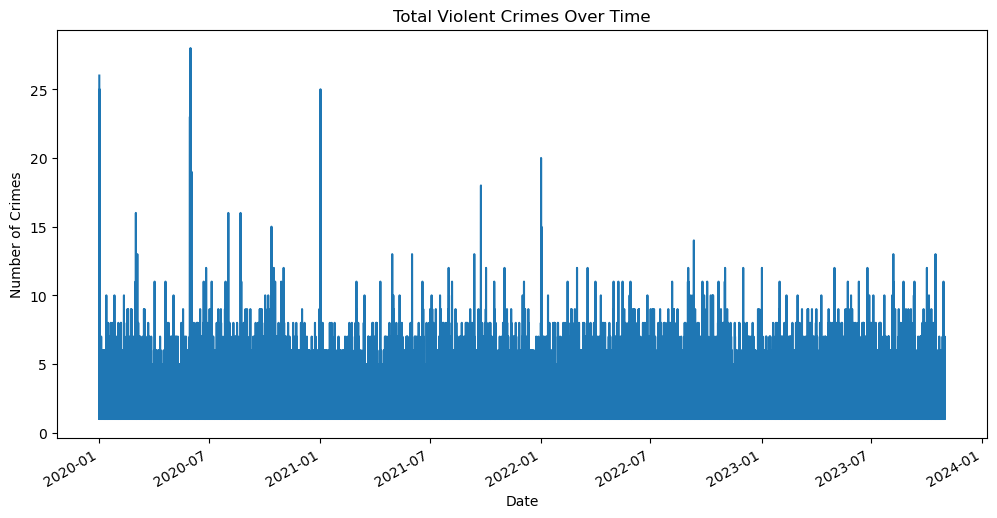

In [124]:
# Group by occurrence date and count the number of crimes per date
violent_crimes_by_date = violent_crimes_df.groupby('Occurence Date').size()

# Plot the total number of violent crimes over time
plt.figure(figsize=(12, 6))
violent_crimes_by_date.plot(kind='line')
plt.title('Total Violent Crimes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')

plt.show()

In [125]:
# deep dive on property crimes over time
# Keywords indicating violent crimes
property_keywords = ['THEFT', 'BURGLARY', 'VANDALISM', 'VEHICLE - STOLEN','ARSON','PICKPOCKET', 'PROPERTY - DAMAGE']

# Create a mask based on the presence of keywords in the 'Crime Description' column
mask = crime_dict_df['Crime Description'].str.contains('|'.join(property_keywords), case=False)

# Filter out the rows corresponding to violent crimes
property_crimes = crime_dict_df[mask]

print(property_crimes)

                                     Crime Description
2             VANDALISM - MISDEAMEANOR ($399 OR UNDER)
3    VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
5             SHOPLIFTING - PETTY THEFT ($950 & UNDER)
7    THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...
8                                BURGLARY FROM VEHICLE
10                                               ARSON
12                  THEFT PLAIN - PETTY ($950 & UNDER)
13                                   THEFT OF IDENTITY
16                                            BURGLARY
17                                    VEHICLE - STOLEN
18     THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
21                                  BUNCO, GRAND THEFT
22                                       THEFT, PERSON
29   THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...
32                  THEFT FROM MOTOR VEHICLE - ATTEMPT
44                                 BURGLARY, ATTEMPTED
49          EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)
51        

In [126]:
property_crimes = [     "VANDALISM - MISDEAMEANOR ($399 OR UNDER)",
                        "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA",
                        "SHOPLIFTING - PETTY THEFT ($950 & UNDER)",
                        "THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL",
                        "BURGLARY FROM VEHICLE",
                        "ARSON",
                        "THEFT PLAIN - PETTY ($950 & UNDER)",
                        "THEFT OF IDENTITY",
                        "BURGLARY",
                        "VEHICLE - STOLEN",
                        "THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)",
                        "BUNCO, GRAND THEFT",
                        "THEFT, PERSON",
                        "THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)",
                        "THEFT FROM MOTOR VEHICLE - ATTEMPT",
                        "BURGLARY, ATTEMPTED",
                        "EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",
                        "BUNCO, PETTY THEFT",
                        'THEFT PLAIN - ATTEMPT',
                        "THEFT FROM PERSON - ATTEMPT",
                        "BURGLARY FROM VEHICLE, ATTEMPTED",
                        "PICKPOCKET",
                        "EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)",
                        "DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER)",
                        "DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950)",
                        "DISHONEST EMPLOYEE - GRAND THEFT",
                        "TILL TAP - GRAND THEFT ($950.01 & OVER)",
                        "PETTY THEFT - AUTO REPAIR",
                        "THEFT, COIN MACHINE - GRAND ($950.01 & OVER)",
                        "GRAND THEFT / INSURANCE FRAUD",
                        "DISHONEST EMPLOYEE - PETTY THEFT",
                        "THEFT, COIN MACHINE - ATTEMPT",
                        "THEFT, COIN MACHINE - PETTY ($950 & UNDER)",
                        "GRAND THEFT / AUTO REPAIR",
                        "PICKPOCKET, ATTEMPT",
                        "TELEPHONE PROPERTY - DAMAGE",
                        "DISHONEST EMPLOYEE ATTEMPTED THEFT",
                        'BOAT - STOLEN',
                        'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)',
                        'PURSE SNATCHING',
                        'BIKE - STOLEN']

# Filter the dataset to include only the violent crimes
property_crimes_df = filtered_data_df[filtered_data_df['Crime Description'].isin(property_crimes)]

# Convert occurrence date to datetime if not already
property_crimes_df['Occurence Date'] = pd.to_datetime(property_crimes_df['Occurence Date'])

# Sort by occurrence date
property_crimes_df = property_crimes_df.sort_values(by='Occurence Date')

# Display the first few rows of the resulting dataframe
property_crimes_df.head()


/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_13903/230894693.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_crimes_df['Occurence Date'] = pd.to_datetime(property_crimes_df['Occurence Date'])


,Division Number,Report Date,Occurence Date,area,Precinct,Reporting District,part,Crime Code,Crime Description,Modus Operandi,Victim Age,Victim Sex,Victim Descent,premise_code,Premise Description,weapon_code,Weapon Description,status,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Location,cross_street,Latitude,Longitude,Year,Month,Month/Year,Hour,weekday_name
126830,210905352,2021-02-04,2020-01-01 00:01:00,9,Van Nuys,991,2,354,THEFT OF IDENTITY,0377 1822 1202 1501,59,M,W,725.0,"GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & C...",Unknown,Unknown,IC,Invest Cont,354.0,Unknown,Unknown,Unknown,4000 BEVERLY GLEN BL,Unknown,34.1389,-118.4611,2020,Jan,2020-01-01,0,Wednesday
101620,211306346,2021-02-22,2020-01-01 00:01:00,13,Newton,1313,2,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0344,0,M,H,203.0,OTHER BUSINESS,Unknown,Unknown,AO,Adult Other,668.0,Unknown,Unknown,Unknown,600 E WASHINGTON BL,Unknown,34.0282,-118.2587,2020,Jan,2020-01-01,0,Wednesday
77924,201004051,2020-01-02,2020-01-01 00:01:00,10,West Valley,1008,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1609,0,M,W,203.0,OTHER BUSINESS,Unknown,Unknown,IC,Invest Cont,745.0,Unknown,Unknown,Unknown,7200 HAYVENHURST AV,Unknown,34.2012,-118.4924,2020,Jan,2020-01-01,0,Wednesday
198066,220706833,2022-03-16,2020-01-01 00:01:00,7,Wilshire,782,2,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",Unknown,0,Unknown,Unknown,203.0,OTHER BUSINESS,Unknown,Unknown,IC,Invest Cont,668.0,Unknown,Unknown,Unknown,1800 S FAIRFAX AV,Unknown,34.0431,-118.3692,2020,Jan,2020-01-01,0,Wednesday
190027,201419371,2020-10-28,2020-01-01 00:01:00,14,Pacific,1453,2,354,THEFT OF IDENTITY,1822,28,M,W,501.0,SINGLE FAMILY DWELLING,Unknown,Unknown,IC,Invest Cont,354.0,Unknown,Unknown,Unknown,4000 REDWOOD AV,Unknown,33.9906,-118.4391,2020,Jan,2020-01-01,0,Wednesday


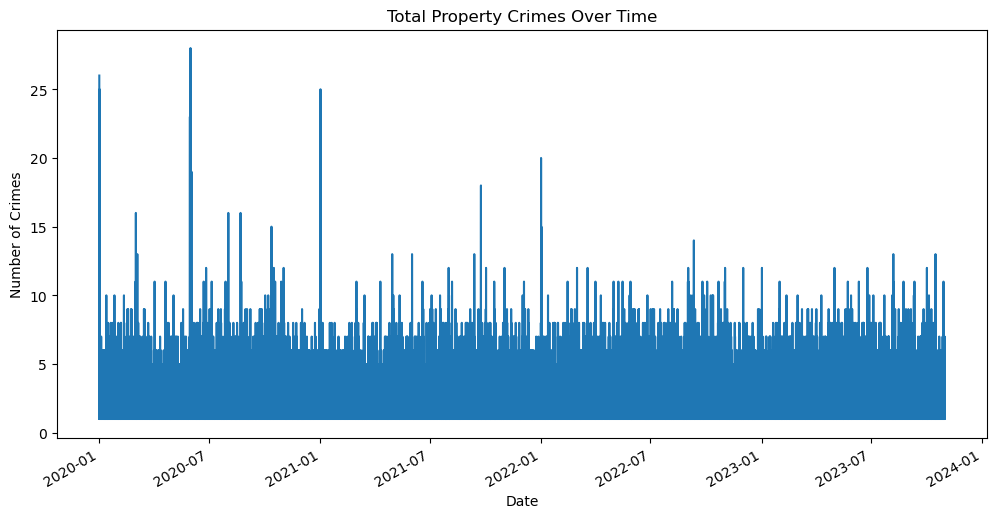

In [128]:
# Group by occurrence date and count the number of crimes per date
property_crimes_by_date = property_crimes_df.groupby('Occurence Date').size()



# Plot the total number of violent crimes over time
plt.figure(figsize=(12, 6))
violent_crimes_by_date.plot(kind='line')
plt.title('Total Property Crimes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

In [129]:
# deep dive other crimes 
# violent keywords
violent_keywords = ['ASSAULT', 'RAPE', 'ROBBERY', 'HOMICIDE', 'LYNCHING','BATTERY','SHOTS','SEX, UNLAWFUL', 'SHOTS FIRED']


# property keywords 
property_keywords = ['THEFT', 'BURGLARY', 'VANDALISM', 'BOAT - STOLEN','VEHICLE - STOLEN','ARSON','PICKPOCKET', 'PROPERTY - DAMAGE']

# create masks
violent_mask = crime_dict_df['Crime Description'].str.contains('|'.join(violent_keywords), case=False)
property_mask = crime_dict_df['Crime Description'].str.contains('|'.join(property_keywords), case=False)

# Filter out rows corresponding to violent and property crimes
other_crimes = crime_dict_df[~(violent_mask | property_mask)]

print(other_crimes)

                                     Crime Description
1            SEX OFFENDER REGISTRANT OUT OF COMPLIANCE
6                            OTHER MISCELLANEOUS CRIME
9               CRIMINAL THREATS - NO WEAPON DISPLAYED
19                                     BRANDISH WEAPON
24                                       BIKE - STOLEN
..                                                 ...
132                                FAILURE TO DISPERSE
133  FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS ...
134       INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)
135                     BLOCKING DOOR INDUCTION CENTER
136                                    INCITING A RIOT

[78 rows x 1 columns]


In [130]:
other_crimes_list = other_crimes['Crime Description'].tolist()
print(other_crimes_list)

['SEX OFFENDER REGISTRANT OUT OF COMPLIANCE', 'OTHER MISCELLANEOUS CRIME', 'CRIMINAL THREATS - NO WEAPON DISPLAYED', 'BRANDISH WEAPON', 'BIKE - STOLEN', 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD', 'VIOLATION OF COURT ORDER', 'TRESPASSING', 'VIOLATION OF RESTRAINING ORDER', 'DISTURBING THE PEACE', 'THROWING OBJECT AT MOVING VEHICLE', 'EXTORTION', 'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ', 'CHILD STEALING', 'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)', 'BOMB SCARE', 'DOCUMENT FORGERY / STOLEN FELONY', 'SEXUAL PENETRATION W/FOREIGN OBJECT', 'FAILURE TO YIELD', 'PURSE SNATCHING', 'INDECENT EXPOSURE', 'ORAL COPULATION', 'VIOLATION OF TEMPORARY RESTRAINING ORDER', 'KIDNAPPING - GRAND ATTEMPT', 'RESISTING ARREST', 'THREATENING PHONE CALLS/LETTERS', 'KIDNAPPING', 'LEWD/LASCIVIOUS ACTS WITH CHILD', 'LEWD CONDUCT', 'UNAUTHORIZED COMPUTER ACCESS', 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH', 'CHILD NEGLECT (SEE 300 W.I.C.)', 'CONTEMPT OF COURT', 'CHILD 

In [131]:
# OTHER CRIMES DF
other_crimes = ['SEX OFFENDER REGISTRANT OUT OF COMPLIANCE', 'OTHER MISCELLANEOUS CRIME',
                'CRIMINAL THREATS - NO WEAPON DISPLAYED', 'BRANDISH WEAPON', 
                'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD', 
                'VIOLATION OF COURT ORDER', 'TRESPASSING', 'VIOLATION OF RESTRAINING ORDER', 
                'DISTURBING THE PEACE', 'THROWING OBJECT AT MOVING VEHICLE', 'EXTORTION', 
                'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ', 'CHILD STEALING', 
                'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)', 'BOMB SCARE', 
                'DOCUMENT FORGERY / STOLEN FELONY', 'SEXUAL PENETRATION W/FOREIGN OBJECT',
                'FAILURE TO YIELD', 'INDECENT EXPOSURE', 'ORAL COPULATION',
                'VIOLATION OF TEMPORARY RESTRAINING ORDER', 'KIDNAPPING - GRAND ATTEMPT', 
                'RESISTING ARREST', 'THREATENING PHONE CALLS/LETTERS', 'KIDNAPPING',
                'LEWD/LASCIVIOUS ACTS WITH CHILD', 'LEWD CONDUCT', 'UNAUTHORIZED COMPUTER ACCESS',
                'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH', 
                'CHILD NEGLECT (SEE 300 W.I.C.)', 'CONTEMPT OF COURT', 'CHILD ANNOYING (17YRS & UNDER)',
                'BUNCO, ATTEMPT', 'PIMPING', 'STALKING', 'SHOPLIFTING - ATTEMPT', 'VEHICLE - ATTEMPT STOLEN',
                'FALSE IMPRISONMENT', 'COUNTERFEIT', 'CREDIT CARDS, FRAUD USE ($950 & UNDER',
                'DOCUMENT WORTHLESS ($200 & UNDER)', 'PROWLER', 'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS', 
                'CHILD PORNOGRAPHY', 'PEEPING TOM', 'TILL TAP - PETTY ($950 & UNDER)', 
                'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE', 'FIREARMS RESTRAINING ORDER (FIREARMS RO)', 
                'DRIVING WITHOUT OWNER CONSENT (DWOC)', 'DOCUMENT WORTHLESS ($200.01 & OVER)', 'PANDERING', 
                'CRUELTY TO ANIMALS', 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)', 'ILLEGAL DUMPING', 
                'MANSLAUGHTER, NEGLIGENT', 'RECKLESS DRIVING', 'PURSE SNATCHING - ATTEMPT',
                'FALSE POLICE REPORT', 'CONSPIRACY', 'CONTRIBUTING',
                'WEAPONS POSSESSION/BOMBING', 'BRIBERY', 'DISRUPT SCHOOL', 
                'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)', 
                'DRUGS, TO A MINOR', 'DRUNK ROLL', 'CHILD ABANDONMENT', 
                'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM', 'BIGAMY', 
                'FAILURE TO DISPERSE', 'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)',
                'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)', 'BLOCKING DOOR INDUCTION CENTER', 
                'INCITING A RIOT']


# Filter the dataset to include only the other crimes
other_crimes_df = filtered_data_df[filtered_data_df['Crime Description'].isin(other_crimes)]

# Convert occurrence date to datetime if not already
other_crimes_df['Occurence Date'] = pd.to_datetime(other_crimes_df['Occurence Date'])

# Sort by occurrence date
other_crimes_df = other_crimes_df.sort_values(by='Occurence Date')

# Display the first few rows of the resulting dataframe
other_crimes_df.head()

/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_13903/301912886.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_crimes_df['Occurence Date'] = pd.to_datetime(other_crimes_df['Occurence Date'])


,Division Number,Report Date,Occurence Date,area,Precinct,Reporting District,part,Crime Code,Crime Description,Modus Operandi,Victim Age,Victim Sex,Victim Descent,premise_code,Premise Description,weapon_code,Weapon Description,status,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Location,cross_street,Latitude,Longitude,Year,Month,Month/Year,Hour,weekday_name
197799,222017118,2022-11-14,2020-01-01 00:01:00,20,Olympic,2074,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,0913 0558 0522 0400 0448 0542,8,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,812.0,860.0,Unknown,Unknown,1800 S NORMANDIE AV,Unknown,34.0437,-118.3029,2020,Jan,2020-01-01,0,Wednesday
148603,201225633,2020-10-21,2020-01-01 00:01:00,12,77th Street,1204,1,815,SEXUAL PENETRATION W/FOREIGN OBJECT,0913 1257 1817,4,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,812.0,815.0,Unknown,Unknown,1400 W VERNON AV,Unknown,34.0037,-118.3007,2020,Jan,2020-01-01,0,Wednesday
30110,200617979,2020-11-13,2020-01-01 00:01:00,6,Hollywood,663,2,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",1501 1822,33,F,W,501.0,SINGLE FAMILY DWELLING,Unknown,Unknown,IC,Invest Cont,956.0,Unknown,Unknown,Unknown,1200 N ORANGE DR,Unknown,34.0926,-118.3416,2020,Jan,2020-01-01,0,Wednesday
199155,231405764,2023-02-10,2020-01-01 00:01:00,14,Pacific,1457,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,0522,14,M,W,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,812.0,860.0,Unknown,Unknown,12400 ALLIN ST,Unknown,33.9884,-118.4177,2020,Jan,2020-01-01,0,Wednesday
195764,221016258,2022-09-20,2020-01-01 00:01:00,10,West Valley,1067,2,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",2041 1906 1822,30,F,O,501.0,SINGLE FAMILY DWELLING,Unknown,Unknown,IC,Invest Cont,956.0,Unknown,Unknown,Unknown,5200 GENESTA AV,Unknown,34.1660,-118.5033,2020,Jan,2020-01-01,0,Wednesday


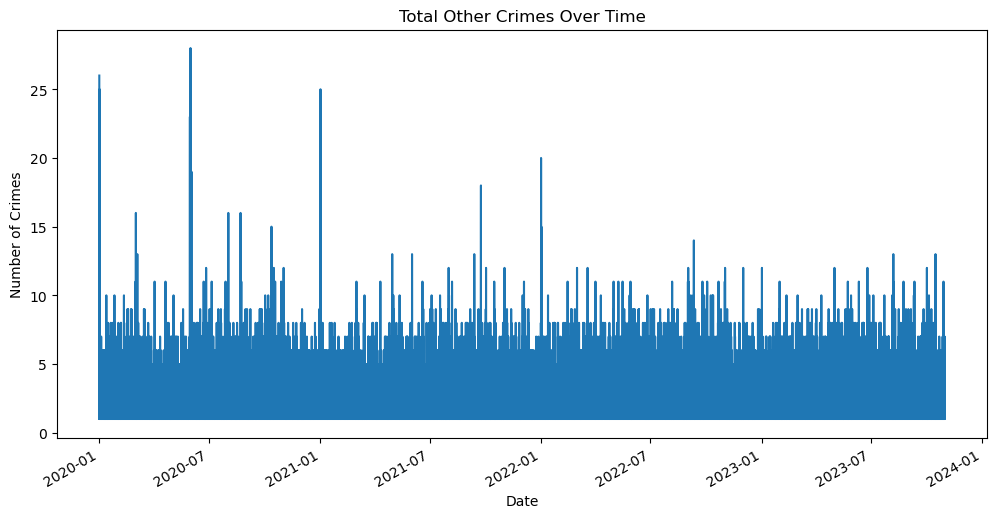

In [133]:
# Group by occurrence date and count the number of crimes per date
other_crimes_by_date = other_crimes_df.groupby('Occurence Date').size()



# Plot the total number of violent crimes over time
plt.figure(figsize=(12, 6))
violent_crimes_by_date.plot(kind='line')
plt.title('Total Other Crimes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

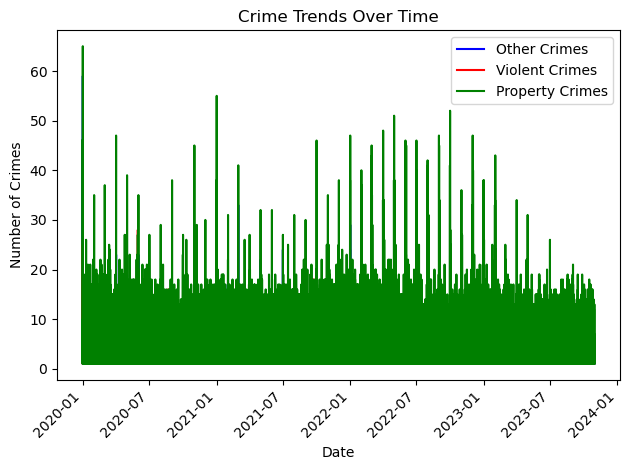

In [135]:
# Convert 'Occurrence Date' to datetime if it's not already in datetime format
other_crimes_df['Occurence Date'] = pd.to_datetime(other_crimes_df['Occurence Date'])
violent_crimes_df['Occurence Date'] = pd.to_datetime(violent_crimes_df['Occurence Date'])
property_crimes_df['Occurence Date'] = pd.to_datetime(property_crimes_df['Occurence Date'])

# Plotting the data
plt.plot(kind='line', figsize=(12, 6))
other_crimes_df.groupby('Occurence Date').size().plot(label='Other Crimes', color='blue')
violent_crimes_df.groupby('Occurence Date').size().plot(label='Violent Crimes', color='red')
property_crimes_df.groupby('Occurence Date').size().plot(label='Property Crimes', color='green')

# Adding labels and title
plt.title('Crime Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Displaying the plot
plt.show()

In [136]:
violent_crimes_df.dtypes


Division Number                 int64
Report Date            datetime64[ns]
Occurence Date         datetime64[ns]
area                            int64
Precinct                       object
Reporting District              int64
part                            int64
Crime Code                      int64
Crime Description              object
Modus Operandi                 object
Victim Age                      int64
Victim Sex                     object
Victim Descent                 object
premise_code                   object
Premise Description            object
weapon_code                    object
Weapon Description             object
status                         object
Status Description             object
Crime Code 1                   object
Crime Code 2                   object
Crime Code 3                   object
Crime Code 4                   object
Location                       object
cross_street                   object
Latitude                      float64
Longitude   

In [137]:
# violent crimes by month year to plot
violent_crimes_by_month_year = violent_crimes_df.groupby('Month/Year').size().reset_index(name='Count')
violent_crimes_by_month_year.head()



,Month/Year,Count
0,2020-01-01,4965
1,2020-02-01,4635
2,2020-03-01,4416
3,2020-04-01,4209
4,2020-05-01,4738


In [138]:
# property crimes by month year to plot
property_crimes_by_month_year = property_crimes_df.groupby('Month/Year').size().reset_index(name='Count')
property_crimes_by_month_year.head()

,Month/Year,Count
0,2020-01-01,9326
1,2020-02-01,8598
2,2020-03-01,8143
3,2020-04-01,8066
4,2020-05-01,8735


In [139]:
# other crimes by month year to plot
other_crimes_by_month_year = other_crimes_df.groupby('Month/Year').size().reset_index(name='Count')
other_crimes_by_month_year.head()

,Month/Year,Count
0,2020-01-01,2431
1,2020-02-01,2293
2,2020-03-01,2039
3,2020-04-01,2022
4,2020-05-01,2115


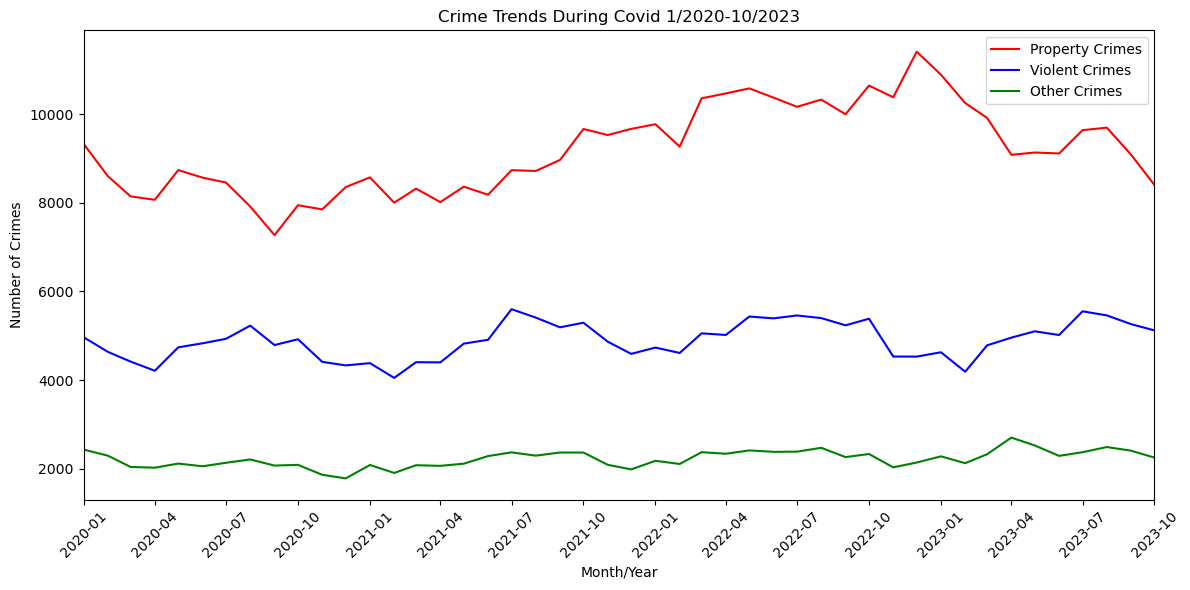

In [153]:

# Convert 'Month/Year' column to datetime format
violent_crimes_by_month_year['Month/Year'] = pd.to_datetime(violent_crimes_by_month_year['Month/Year'])
property_crimes_by_month_year['Month/Year'] = pd.to_datetime(property_crimes_by_month_year['Month/Year'])
other_crimes_by_month_year['Month/Year'] = pd.to_datetime(other_crimes_by_month_year['Month/Year'])

# Plotting the data
plt.figure(figsize=(12, 6))

plt.plot(property_crimes_by_month_year['Month/Year'], property_crimes_by_month_year['Count'], label='Property Crimes', color='red')
plt.plot(violent_crimes_by_month_year['Month/Year'], violent_crimes_by_month_year['Count'], label='Violent Crimes', color='blue')
plt.plot(other_crimes_by_month_year['Month/Year'], other_crimes_by_month_year['Count'], label='Other Crimes', color='green')

# Adding labels and title
plt.title('Crime Trends During Covid 1/2020-10/2023')
plt.xlabel('Month/Year')
plt.ylabel('Number of Crimes')
plt.legend()

# Set ticks at each quarter
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Format the date on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Limit the x-axis to end at October 2023
plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2023-10-01'))

plt.xticks(rotation=45)
plt.tight_layout()
# plt.box(False)

# Displaying the plot
plt.show()

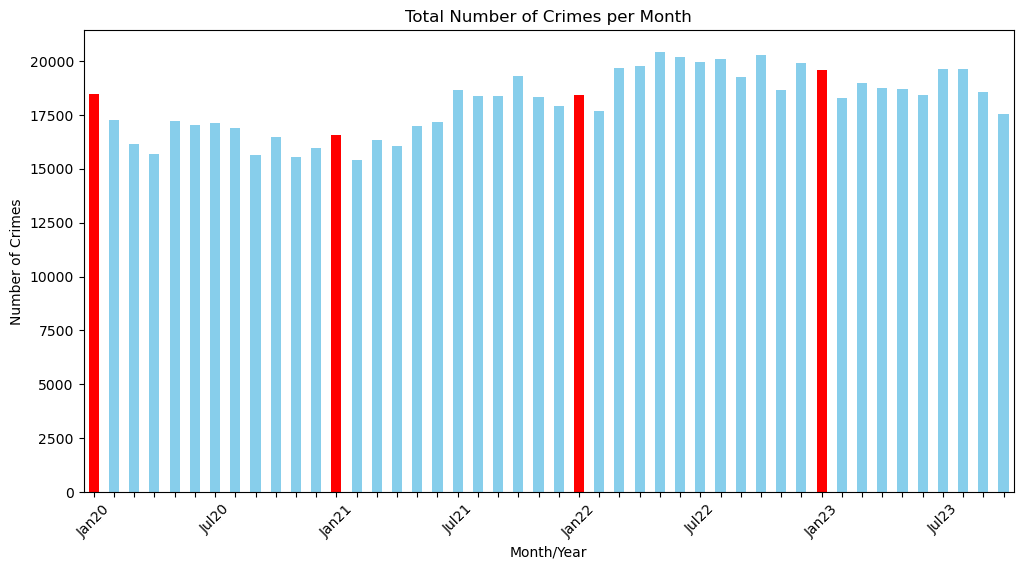

In [225]:
# Calculate total number of crimes per month
crime_counts_by_month = filtered_data_df.groupby('Month/Year').size()

# Visualize the data
plt.figure(figsize=(12, 6))
ax = crime_counts_by_month.plot(kind='bar', color=['red' if idx.month == 1 else 'skyblue' for idx in crime_counts_by_month.index])
plt.title('Total Number of Crimes per Month')
plt.xlabel('Month/Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.6)

# Modify x-axis labels
labels = [date.strftime('%b%y') if date.month in [1, 7] else '' for date in crime_counts_by_month.index]
ax.set_xticklabels(labels)
plt.show()

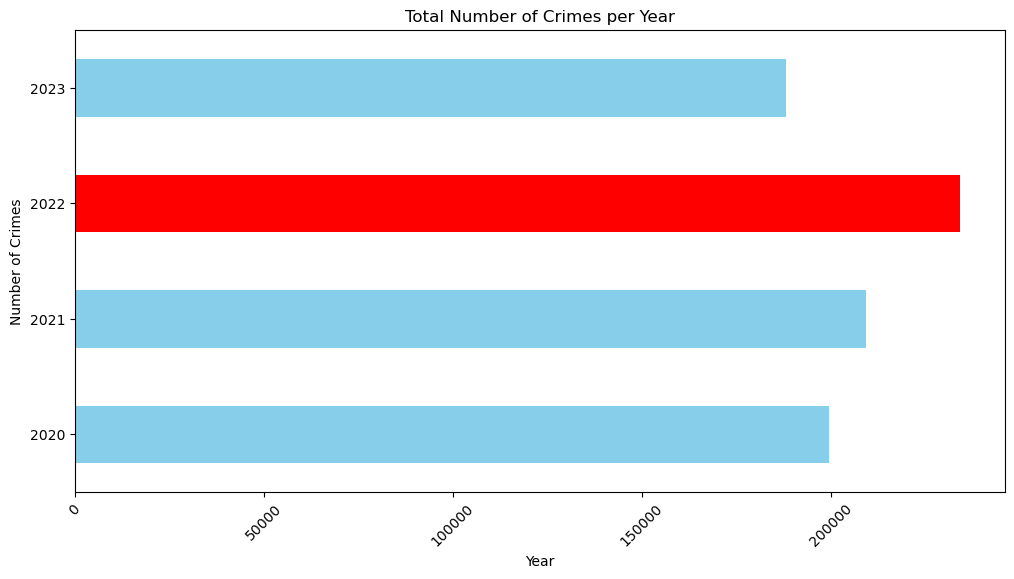

In [189]:
# Filter the data to include only the years 2020 to 2023
data_df = filtered_data_df[(filtered_data_df['Year'] >= 2020) & (filtered_data_df['Year'] <= 2023)]

# Calculate total number of crimes per year
crime_counts_by_year = data_df.groupby('Year').size()

# Visualize the data
plt.figure(figsize=(12, 6))
bar_colors = ['skyblue' if year != 2022 else 'red' for year in crime_counts_by_year.index]
crime_counts_by_year.plot(kind='barh', color=bar_colors)
plt.title('Total Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

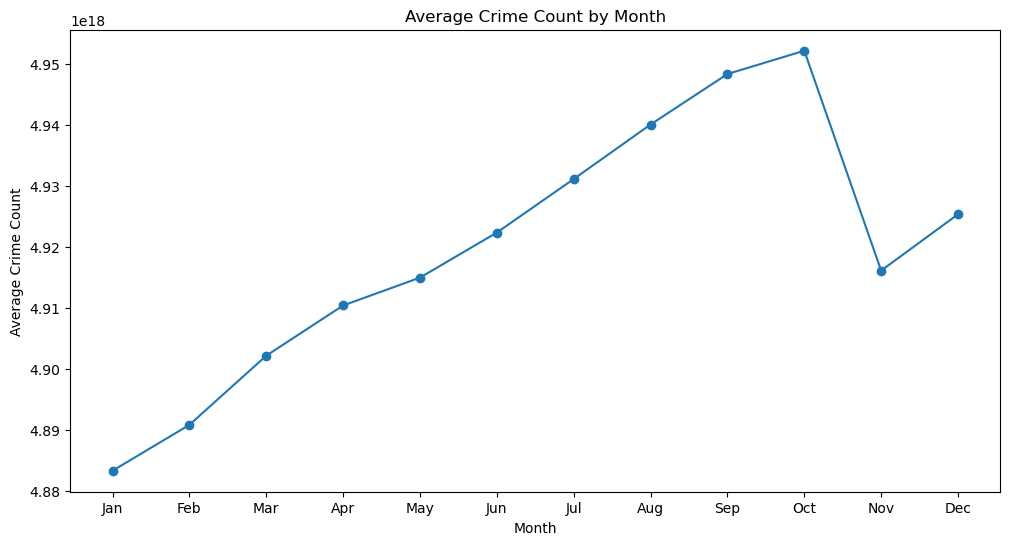

In [158]:
# Sum up the counts for each type of crime in each dataframe
violent_crimes_df['Crime Count'] = violent_crimes_df.apply(pd.to_numeric, errors='coerce').sum(axis=1)
property_crimes_df['Crime Count'] = property_crimes_df.apply(pd.to_numeric, errors='coerce').sum(axis=1)
other_crimes_df['Crime Count'] = other_crimes_df.apply(pd.to_numeric, errors='coerce').sum(axis=1)

# Combine the dataframes
combined_df = pd.concat([violent_crimes_df[['Occurence Date', 'Crime Count']],
                         property_crimes_df[['Occurence Date', 'Crime Count']],
                         other_crimes_df[['Occurence Date', 'Crime Count']]])

# Convert 'Occurrence Date' to datetime format
combined_df['Occurence Date'] = pd.to_datetime(combined_df['Occurence Date'])

# Extract month from 'Occurrence Date'
combined_df['Month'] = combined_df['Occurence Date'].dt.month

# Group by month and calculate average crime count
average_crime_count_by_month = combined_df.groupby('Month')['Crime Count'].mean()

# Plot the seasonal trends
plt.figure(figsize=(12, 6))
average_crime_count_by_month.plot(kind='line', marker='o')
plt.title('Average Crime Count by Month')
plt.xlabel('Month')
plt.ylabel('Average Crime Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [159]:
violent_crimes_df.head()

,Division Number,Report Date,Occurence Date,area,Precinct,Reporting District,part,Crime Code,Crime Description,Modus Operandi,Victim Age,Victim Sex,Victim Descent,premise_code,Premise Description,weapon_code,Weapon Description,status,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Location,cross_street,Latitude,Longitude,Year,Month,Month/Year,Hour,weekday_name,Crime Count
195424,221413475,2022-07-05,2020-01-01 00:01:00,14,Pacific,1458,1,121,"RAPE, FORCIBLE",0558 0400 1258 0522,10,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,121.0,812.0,Unknown,Unknown,4800 S SLAUSON AV,Unknown,33.9955,-118.4099,2020,Jan,2020-01-01,0,Wednesday,4.812653e+18
198387,222008538,2022-04-16,2020-01-01 00:01:00,20,Olympic,2054,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0603 0522 0551 0913 0334 0445,45,F,O,108.0,PARKING LOT,201.0,KNIFE WITH BLADE OVER 6 INCHES IN LENGTH,AO,Adult Other,230.0,Unknown,Unknown,Unknown,900 S NORMANDIE AV,Unknown,34.0533,-118.3003,2020,Jan,2020-01-01,0,Wednesday,4.805741e+18
120960,201814725,2020-07-27,2020-01-01 00:01:00,18,Southeast,1801,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,0400 0913 1257,4,F,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,627.0,Unknown,Unknown,Unknown,9100 BARING CROSS ST,Unknown,33.9528,-118.2893,2020,Jan,2020-01-01,0,Wednesday,4.751482e+18
13410,221407877,2022-03-19,2020-01-01 00:01:00,14,Pacific,1409,1,815,SEXUAL PENETRATION W/FOREIGN OBJECT,0400,4,M,A,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,812.0,815.0,Unknown,Unknown,3600 FARIS DR,Unknown,34.0283,-118.4010,2020,Jan,2020-01-01,0,Wednesday,4.803322e+18
148603,201225633,2020-10-21,2020-01-01 00:01:00,12,77th Street,1204,1,815,SEXUAL PENETRATION W/FOREIGN OBJECT,0913 1257 1817,4,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,812.0,815.0,Unknown,Unknown,1400 W VERNON AV,Unknown,34.0037,-118.3007,2020,Jan,2020-01-01,0,Wednesday,4.758912e+18


In [166]:
crime_counts_by_month.head()

Month/Year
2020-01-01    18489
2020-02-01    17252
2020-03-01    16163
2020-04-01    15678
2020-05-01    17201
dtype: int64

/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_13903/1755569208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_df['Occurence Date'] = pd.to_datetime(filtered_data_df['Occurence Date'])
/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_13903/1755569208.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_df['Month'] = filtered_data_df['Occurence Date'].dt.to_period('M')


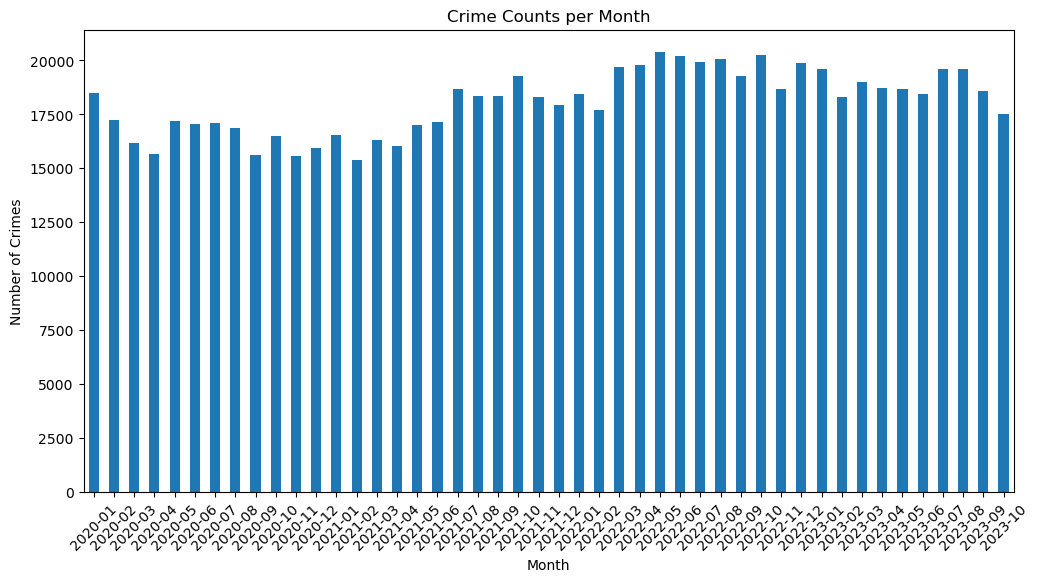

In [171]:
filtered_data_df['Occurence Date'] = pd.to_datetime(filtered_data_df['Occurence Date'])

# Extract month and year from 'Occurrence Date'
filtered_data_df['Month'] = filtered_data_df['Occurence Date'].dt.to_period('M')

# Group by month and calculate crime counts
crime_counts_per_month = filtered_data_df.groupby('Month').size()

# Plot the crime counts per month
plt.figure(figsize=(12, 6))
crime_counts_per_month.plot(kind='bar')
plt.title('Crime Counts per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


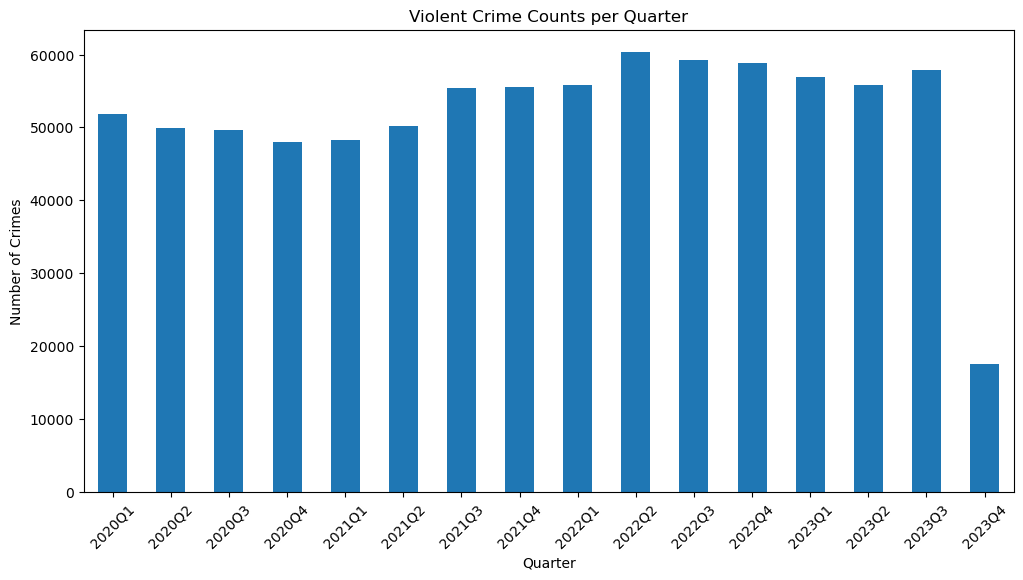

In [184]:
violent_crimes_df['Occurence Date'] = pd.to_datetime(violent_crimes_df['Occurence Date'])

# Extract month and year from 'Occurrence Date'
violent_crimes_df['Quarter'] = violent_crimes_df['Occurence Date'].dt.to_period('Q')

# Group by month and calculate crime counts
violent_crimes_per_quarter = violent_crimes_df.groupby('Quarter').size()

# Plot the crime counts per month
plt.figure(figsize=(12, 6))
crime_counts_per_quarter.plot(kind='bar')
plt.title('Violent Crime Counts per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

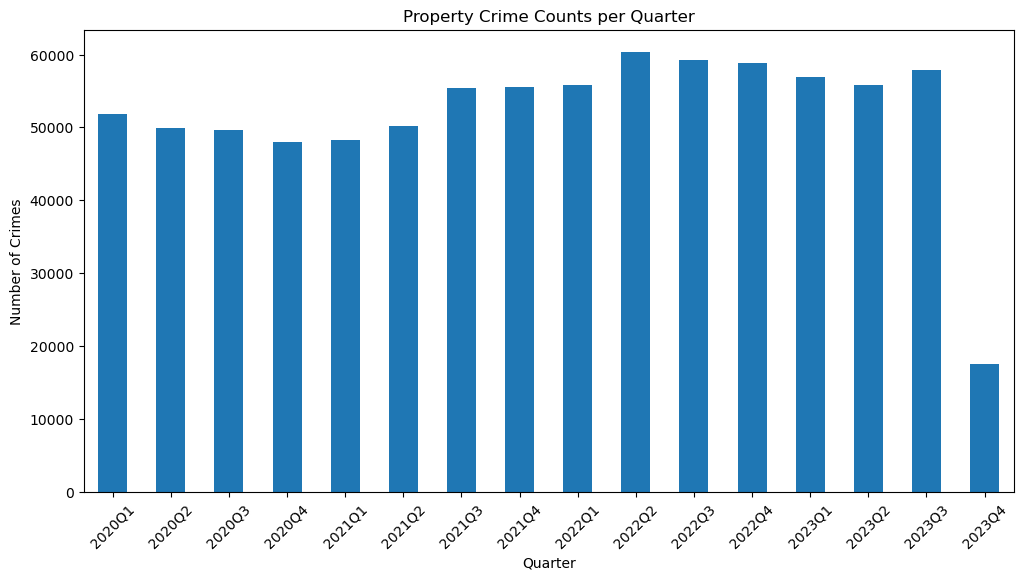

In [185]:
property_crimes_df['Occurence Date'] = pd.to_datetime(property_crimes_df['Occurence Date'])

# Extract month and year from 'Occurrence Date'
property_crimes_df['Quarter'] = property_crimes_df['Occurence Date'].dt.to_period('Q')

# Group by month and calculate crime counts
property_crimes_per_month = property_crimes_df.groupby('Quarter').size()

# Plot the crime counts per month
plt.figure(figsize=(12, 6))
crime_counts_per_quarter.plot(kind='bar')
plt.title('Property Crime Counts per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

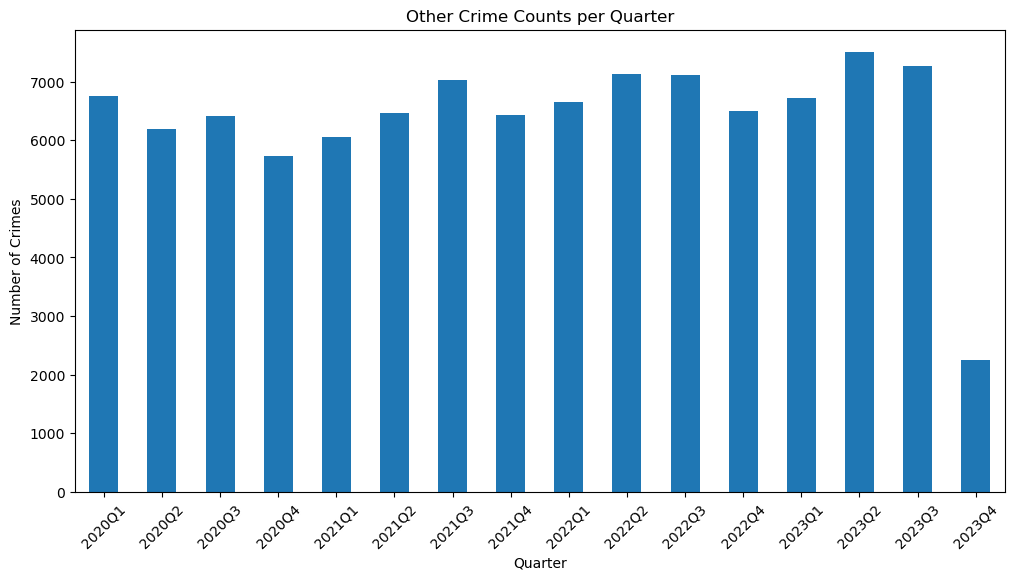

In [186]:
other_crimes_df['Occurence Date'] = pd.to_datetime(other_crimes_df['Occurence Date'])

# Extract month and year from 'Occurrence Date'
other_crimes_df['Quarter'] = other_crimes_df['Occurence Date'].dt.to_period('Q')

# Group by month and calculate crime counts
other_crimes_per_quarter = other_crimes_df.groupby('Quarter').size()

# Plot the crime counts per month
plt.figure(figsize=(12, 6))
other_crimes_per_quarter.plot(kind='bar')
plt.title('Other Crime Counts per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_13903/3491630963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_df['Occurence Date'] = pd.to_datetime(filtered_data_df['Occurence Date'])
/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_13903/3491630963.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_df['Quarter'] = filtered_data_df['Occurence Date'].dt.to_period('Q')


TypeError: 'bool' object is not callable

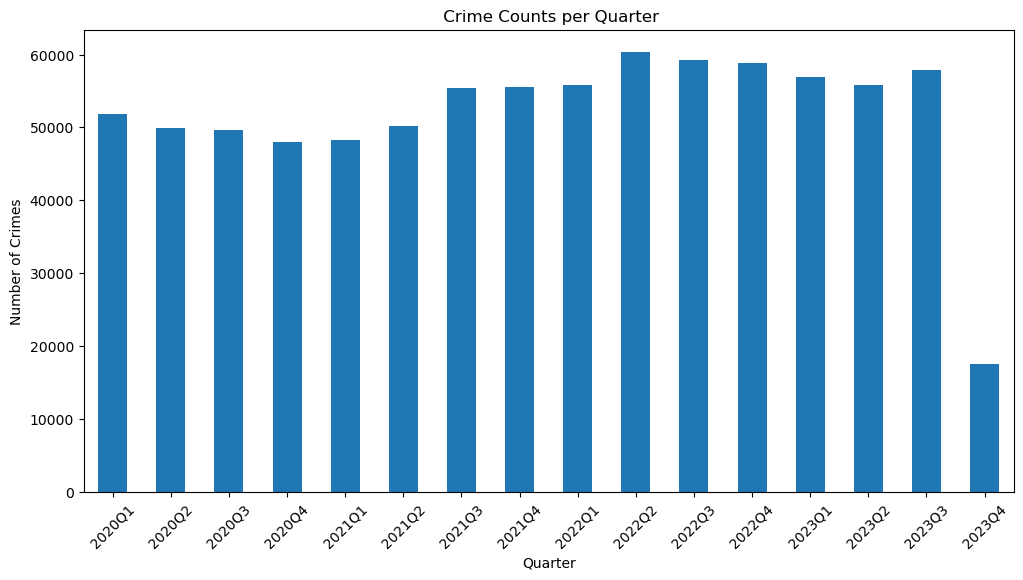

In [180]:
# Convert 'Occurence Date' to datetime format
filtered_data_df['Occurence Date'] = pd.to_datetime(filtered_data_df['Occurence Date'])

# Extract quarter and year from 'Occurence Date'
filtered_data_df['Quarter'] = filtered_data_df['Occurence Date'].dt.to_period('Q')

# Group by quarter and calculate crime counts
crime_counts_per_quarter = filtered_data_df.groupby('Quarter').size()

# Plot the crime counts per quarter
plt.figure(figsize=(12, 6))
crime_counts_per_quarter.plot(kind='bar')
plt.title(' Crime Counts per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [188]:
# Group by 'Month/Year' and 'Crime Description' to get the count of each crime type per month
most_common_by_month = filtered_data_df.groupby(['Month', 'Crime Description']).size().unstack(fill_value=0)

# Find the most common crime for each month
most_common_crimes_by_month = most_common_by_month.idxmax(axis=1)

# Print the results
print(most_common_crimes_by_month)

Month
2020-01    BATTERY - SIMPLE ASSAULT
2020-02    BATTERY - SIMPLE ASSAULT
2020-03            VEHICLE - STOLEN
2020-04            VEHICLE - STOLEN
2020-05            VEHICLE - STOLEN
2020-06            VEHICLE - STOLEN
2020-07            VEHICLE - STOLEN
2020-08            VEHICLE - STOLEN
2020-09            VEHICLE - STOLEN
2020-10            VEHICLE - STOLEN
2020-11            VEHICLE - STOLEN
2020-12            VEHICLE - STOLEN
2021-01            VEHICLE - STOLEN
2021-02            VEHICLE - STOLEN
2021-03            VEHICLE - STOLEN
2021-04            VEHICLE - STOLEN
2021-05            VEHICLE - STOLEN
2021-06            VEHICLE - STOLEN
2021-07            VEHICLE - STOLEN
2021-08            VEHICLE - STOLEN
2021-09            VEHICLE - STOLEN
2021-10            VEHICLE - STOLEN
2021-11            VEHICLE - STOLEN
2021-12            VEHICLE - STOLEN
2022-01            VEHICLE - STOLEN
2022-02            VEHICLE - STOLEN
2022-03            VEHICLE - STOLEN
2022-04            VEH